# 데이터분석 경진대회 (JB사냥개들)

##  목차  
### [1. 데이터 파악](#s-1) 
+ [1.1 데이터 및 패키지 불러오기](#s-1.1)    
+ [1.2 데이터 컬럼 정보](#s-1.2)   
+ [1.3 데이터 결측값, 이상값 확인](#s-1.3)     
+ [1.4 이상값 및 결측값 -> 결측치 처리](#s-1.4)     
+ [1.5 결측치 간 패턴 등 연관성 파악](#s-1.5)   
+ [1.6 결측치 대체(추정통계량대체)](#s-1.6)
+ [1.7 결측치 대체(DL)](#s-1.7)
+ [1.8 결측치 대체(MI)](#s-1.8)


### [2. 데이터 시각화](#s-2) 
+ [2.1 타겟변수 파악](#s-2.1)  

### [3. Feature Enginnering](#s-3)

### [4. Modeling](#s-4)


## 1. 데이터 파악  <a id="s-1">

1. 데이터 불러오기: 분석에 필요한 데이터를 적절한 형식으로 불러옵니다. 일반적으로 CSV, Excel, JSON 등 다양한 형식의 파일을 사용합니다.
2. 데이터 확인: 데이터셋의 크기와 구조를 파악합니다. head(), tail(), info(), describe() 등의 함수를 사용하여 첫 몇 개의 행이나 열, 변수 정보, 요약 통계량 등을 확인할 수 있습니다.
3. 결측치 처리: 결측치(missing values)가 있는지 확인하고 필요에 따라 처리합니다. 결측치를 제거하거나 대체하는 방법으로 처리할 수 있습니다.
4. 변수 탐색: 각 변수들의 분포와 특성을 살펴보며 이상치(outlier), 중복값(duplicate value), 범주형 변수의 고유값(unique values) 등을 확인합니다.

### 1-1. 데이터 및 패키지 불러오기 <a id="s-1.1">

- #### 디렉토리 설정 및 Raw Data 불러오기

In [133]:
import os
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import chi2, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.layers import LSTM, Dense, Dropout



import warnings
warnings.filterwarnings('ignore')
# 기본 폰트로 설정 (영어 폰트로 변경)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
#plt.rcParams['font.family'] = 'AppleGothic' #'NanumGothic'

#path = "/Users/apple/Desktop/jbfg_ds_2nd/"
#os.chdir(path)

In [134]:
df = pd.read_csv('loan_customer.csv')

In [135]:
pd.set_option('display.max_columns',None)
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,-19046.0,NaN,-4260.0,-2531.0,1,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.0,NaN,NaN,-3866.0,1,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.0,-746.0,-108.0,NaN,1,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,NaN,-475.0,NaN,-513.0,1,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


### 1-2. 데이터 컬럼 정보 <a id="s-1.2">

- #### 원활한 데이터 처리를 위해 컬럼정보(한글명)를 참고 활용 (지주 제공 ppt참고)

In [136]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [137]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

### 1-3. 데이터 결측값, 이상값 확인  <a id="s-1.3">

- #### 각 컬럼별 데이터 유형 및 결측치 확인 

In [138]:
df_colinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   대출식별번호                                   24000 non-null  int64  
 1   계약유형                                     24000 non-null  object 
 2   성별                                       16906 non-null  object 
 3   자가부동산보유여부                                14429 non-null  object 
 4   자녀수                                      24000 non-null  int64  
 5   소득금액(USD)                                24000 non-null  float64
 6   신용대출금액(USD)                              16700 non-null  float64
 7   소득유형                                     24000 non-null  object 
 8   학력                                       24000 non-null  object 
 9   결혼상태                                     24000 non-null  object 
 10  주거형태                                     24000

> #### <font color = lightseagreen>_데이터 유형 확인 : 수치형으로 보여지는 변수는 float/int, 범주형 변수는 object로 적용되어있음 </font>_
> #### <font color = lightseagreen>_결측값 및 이상값 확인 : 몇몇 컬럼에 대해 상당한 결측치가 존재함. 결측치 대체를 어떻게 하느냐가 매우 중요해 보임 </font>_

- #### SK_ID_CURR 키값에 중복여부 체크 진행, 대출식별 기준으로 그룹화하고 counting

In [139]:
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


> #### <font color = lightseagreen>  _SK_ID_CURR 키값에 중복여부 확인 결과 :  모두 고유값임 </font>_

- #### 각 컬럼별 유효값 확인

In [140]:
for column in df.columns:
    unique_values = df[column].drop_duplicates().dropna()
    value_counts = df[column].value_counts(dropna=False)
    truncated_value_counts = value_counts.head(60)  # Display only top 60 value counts
    print("-----------------------------------------------------------")
    print(f"Value counts for {column}")
    print(f"{column_info.get(column, 'No information')}")
    print(f"{truncated_value_counts} Unique valid values count: {len(unique_values)}")

-----------------------------------------------------------
Value counts for SK_ID_CURR
대출식별번호
100002    1
337229    1
337317    1
337293    1
337288    1
337287    1
337262    1
337261    1
337245    1
337242    1
337231    1
337226    1
337079    1
337217    1
337216    1
337211    1
337206    1
337164    1
337154    1
337134    1
337126    1
337101    1
337318    1
337323    1
337327    1
337345    1
337579    1
337578    1
337564    1
337550    1
337549    1
337534    1
337524    1
337516    1
337493    1
337487    1
337476    1
337459    1
337458    1
337433    1
337396    1
337393    1
337377    1
337368    1
337353    1
337096    1
337075    1
337616    1
336603    1
336720    1
336713    1
336690    1
336659    1
336651    1
336650    1
336643    1
336620    1
336609    1
336563    1
337072    1
Name: SK_ID_CURR, dtype: int64 Unique valid values count: 24000
-----------------------------------------------------------
Value counts for NAME_CONTRACT_TYPE
계약유형
Cash loans         2

> #### <font color = lightseagreen> _오기값 발견 : ORGANIZATION_TYPE의 XNA는 4,294건, CODE_GENDER의 XNA는 1건, NAME_FAMILY_STATUS의 Unknown은 1건_</font> 
> #### <font color = lightseagreen> _1. 오기값 및 결측값 종류 : __'NaN', 'nan', 'XNA', 'Unknown'__  ▶ np.nan로 통일 진행 필요_ </font>  
> #### <font color = lightseagreen> _2. __'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구’__ ▶ 일반적인 실수형태의 연속형이라기보다는 하나의 지역을 의미하며 높을수록 인구수가 많은 것으로 이해_ </font>   
> #### <font color = lightseagreen> _3. __'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’__ ▶ 결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건이라는 최다 빈도를 발생시키므로써 이상치 유무 재확인 후 결측치로 처리하여 대체 진행예정_ </font>
> #### <font color = lightseagreen> _4. __'FLAG_MOBIL':'휴대폰번호등록여부'__ ▶ 모두 휴대폰을 등록한 것으로 나와있어 단일값인 1을 지님. 해당 컬럼은 지워도 무방하다고 판단됨_ </font>  

### 1.4 결측값(오기값 등) -> 결측치 처리 <a id="s-1.4">

- #### 각 컬럼별 유효값 및 의미와 정보들을 숙지하여 해당 결측값(오기값)을 모두 결측치로 통일하여 처리 : 최종 처리한 데이터프레임은 __'df_adj_mv'__

In [141]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

- #### 수치형 데이터에 대한 이상치 확인  

> #### 전반적인 결측치들의 빈도와 유형을 파악 전, 'DAYS_EMPLOYED' 컬럼 내 의심스러운 단일값과 및 이외 수치형 데이터에 존재하는 이상치도 확인하고자 함 _(IQR기반 이상치 탐지 진행)_ 

In [142]:
def count_outliers_ratio(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # 범주형 변수와 바이너리 변수 제외
    exclude_cols = [col for col in df.columns if df[col].dtype == object] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {0, 1}] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {1, 2, 3}] + \
                   ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
    
    numeric_cols = list(set(numeric_cols) - set(exclude_cols))
    
    result = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # 이상치의 조건 정의 (IQR * 1.5 범위 밖의 값)
        outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # 해당 컬럼의 이상치 건수 계산
        num_outliers = outlier_condition.sum()

        # 전체 행 대비 이상치 비율 계산
        ratio_outliers = num_outliers / len(df)

        result.append({'Column': col,
                       '# Outliers': num_outliers,
                       '% Outliers': ratio_outliers})

    result_df = pd.DataFrame(result).sort_values('# Outliers', ascending=False).reset_index(drop=True)
    
    return result_df

outlier_counts_df = count_outliers_ratio(df_adj_mv)
print(outlier_counts_df)

              Column  # Outliers  % Outliers
0      DAYS_EMPLOYED        3919    0.163292
1   AMT_INCOME_TOTAL        1123    0.046792
2         AMT_CREDIT         357    0.014875
3         CB_SCORE_2         132    0.005500
4         CB_SCORE_1         113    0.004708
5         CB_SCORE_3         107    0.004458
6  DAYS_REGISTRATION          40    0.001667
7         DAYS_BIRTH           0    0.000000
8         FLAG_MOBIL           0    0.000000
9    DAYS_ID_PUBLISH           0    0.000000


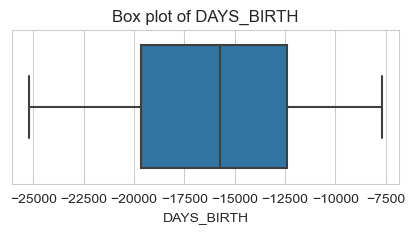

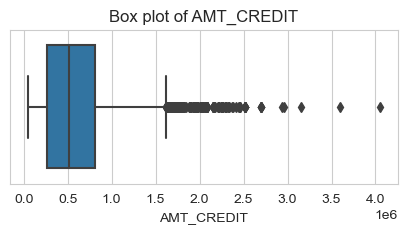

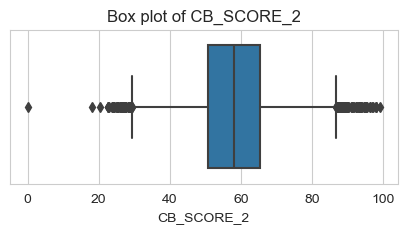

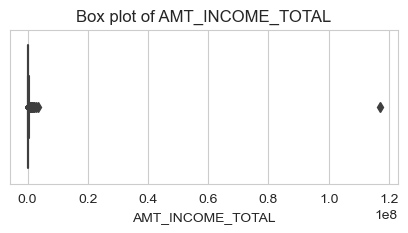

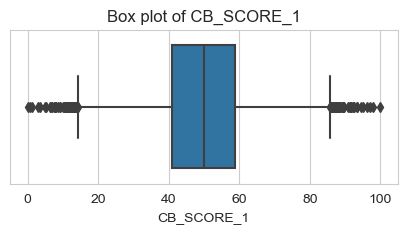

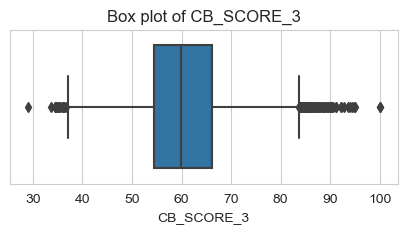

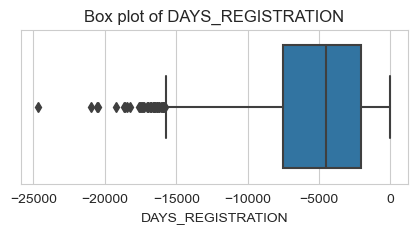

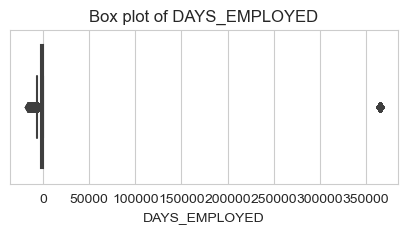

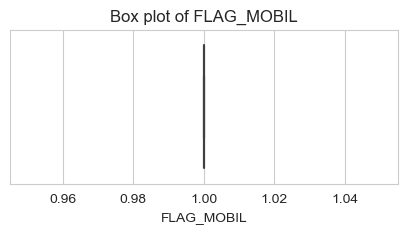

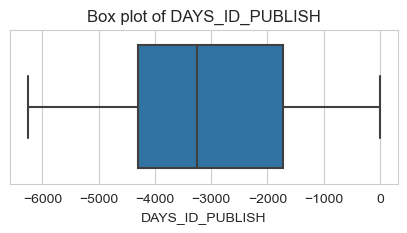

In [143]:
numeric_cols = df_adj_mv.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = [col for col in df_adj_mv.columns if df_adj_mv[col].dtype == object] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {0, 1}] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {1, 2, 3}] + \
               ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
numeric_cols = list(set(numeric_cols) - set(exclude_cols))

for col in numeric_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()



In [145]:
Q1 = df_adj_mv['DAYS_REGISTRATION'].quantile(0.25)
Q3 = df_adj_mv['DAYS_REGISTRATION'].quantile(0.75)
mins = df_adj_mv['DAYS_REGISTRATION'].min()
maxs = df_adj_mv['DAYS_REGISTRATION'].max()
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print(mins)
print(maxs)


Q1 (25th percentile): -7537.0
Q3 (75th percentile): -2050.5
IQR: 5486.5
-24672.0
0.0


> #### <font color = lightseagreen> __'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’__ ▶ _결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건을 가지며 IQR통해 이상치로 확인됨_ </font>
> #### <font color = lightseagreen> _이외 CB스코어 및 신용대출금액과 소득금액의 이상치로 나오는 항목들은 각 컬럼별 유효값들의 빈도 수가 현저히 적으며_ </font>    
> #### <font color = lightseagreen> _또한 DAYS_EMPLOYED와 같이 특정 값에 지나치게 쏠림(2,999건)이 없을뿐더러, 이상치 값 자체가 중요한 특성을 반영할 수 있다고 판단됨_ </font>  
> #### <font color = lightseagreen> _현재 결측치가 상당히 많기때문에 결측치 대체 후 이상치에 대해 처리 여부 검토 진행_ </font>

- #### 최종적으로 Null값으로 처리할 유효값들 정리

In [79]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown', 365243.0], np.nan)

In [80]:
for column in df_adj_mv.columns:
    value_counts = df_adj_mv[column].value_counts(dropna = False)
    #print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

> #### <font color = lightseagreen> _상당한 컬럼들에 결측치가 있음을 확인.    대부분 결측치가 있는 컬럼별로 결측치는 약 4,000 ~ 10,000개가 있으므로 20~40% 를 차지함_ </font>
> #### <font color = lightseagreen> _주어진 유효값들에 패턴에 의해 결측치가 발생된건지,   무작위 패턴으로 결측치가 있는 것인지 면밀한 확인이 필요함_ </font>

###  1.5 결측치 간 패턴 등 연관성 파악 <a id="s-1.5">

- #### 최종 결측치가 있는 컬럼 파악

In [17]:
# 결측값이 있는 행 선택하기
col_mv_list = df_adj_mv.columns[df_adj_mv.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- NAME_FAMILY_STATUS 결혼상태
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- ORGANIZATION_TYPE 근무회사유형
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 최종 결측치가 있는 행 파악

In [18]:
df_adj_mv2 = df_adj_mv[df_adj_mv.isnull().any(axis=1)]
df_adj_mv2.shape

(23636, 35)

In [19]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_adj_mv),"중",len(df_adj_mv[df_adj_mv.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_adj_mv.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23636


CODE_GENDER                    7095
FLAG_OWN_REALTY                9571
AMT_CREDIT                     7300
NAME_FAMILY_STATUS                1
REGION_POPULATION_RELATIVE     7149
DAYS_BIRTH                     4749
DAYS_EMPLOYED                 10148
DAYS_REGISTRATION              9733
DAYS_ID_PUBLISH                4741
ORGANIZATION_TYPE              4294
CB_SCORE_1                     6146
CB_SCORE_2                     8274
CB_SCORE_3                     7108
dtype: int64

- #### 결측치 유형 파악에 앞서, 결측치 컬럼별 결측치일시 비결측치인 각 컬럼들에 대한 유효값 및 해당 유효값의 빈도수 파악

In [20]:
def most_frequent_values(df, columns_with_null):
    # Initialize an empty DataFrame to store the results
    result = pd.DataFrame()

    for col in columns_with_null:
        # Create a mask where the current column is null
        mask = df[col].isnull()
        
        # Count the number of nulls in the current column
        null_count = mask.sum()

        # Select rows where current column is null and drop columns with any null values in these rows
        df_null = df.loc[mask].dropna(axis=1)

        if not df_null.empty:
            # For each column, find the most frequent value and its count
            res_list = []
            for c in df_null.columns:
                try:
                    mode_value, count_value = df_null[c].mode()[0], df_null[c].value_counts().iloc[0]
                    res_list.append((c, mode_value, count_value))
                except Exception as e:
                    print(f"An exception occurred for column {c}: {str(e)}")
                    
            res_df = pd.DataFrame(res_list, columns=['Column', 'Most Frequent Value', 'Count'])

            # Add the results to the main DataFrame with current column as an additional level of index,
            # and include null_count as part of index label
            result = pd.concat([result, res_df.set_index([pd.Index([f"{col} (Nulls: {null_count})"]*len(res_df)), 'Column'])])

    return result

# Usage remains same...

columns_with_null = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE',
                    'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','ORGANIZATION_TYPE','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3']  # Add more columns as needed

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

result_df = most_frequent_values(df_adj_mv, columns_with_null)
print(result_df.to_string())


                                                                               Most Frequent Value  Count
                                         Column                                                          
CODE_GENDER (Nulls: 7095)                SK_ID_CURR                                         100004      1
                                         NAME_CONTRACT_TYPE                             Cash loans   6424
                                         CNT_CHILDREN                                            0   4974
                                         AMT_INCOME_TOTAL                                 135000.0    808
                                         NAME_INCOME_TYPE                                  Working   3617
                                         NAME_EDUCATION_TYPE         Secondary / secondary special   5057
                                         NAME_FAMILY_STATUS                                Married   4559
                                         NAME_

- #### 각 컬럼별 결측치 구성비율 파악

In [21]:
def missing_ratio(df):
    return df.isnull().mean()

# Usage example with a dataset 'df'
print(missing_ratio(df_adj_mv))

SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.295625
FLAG_OWN_REALTY               0.398792
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.304167
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000042
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.297875
DAYS_BIRTH                    0.197875
DAYS_EMPLOYED                 0.422833
DAYS_REGISTRATION             0.405542
DAYS_ID_PUBLISH               0.197542
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
REGION_RATING_CLIENT          0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
REG_CITY_NOT_WORK_CITY   

- #### 결측치 유형 및 유형별 처리방법

__1.<U> 완전 무작위 결측(MCAR: Missing Completely At Random)</U> :__  
X1, X2, X3라는 특성이 있다고 가정시 이 때, X2열의 결측치가 X1, X2, X3열의 다른 값들과 아무런 상관관계가 없을 경우,  
이를 완전 무작위 결측이라 함.

__2. <U>무작위 결측(MAR: Missing At Random)</U> :__  
X1, X2, X3라는 특성이 있다고 가정, 이 때, X1이 True인 경우, X2는 결측치를 갖고, X1이 False인 경우, X2는 값을 가진다면, 다시 말해 다른 특성의 값에 따라 결측치의 발생 확률이 계산될 경우임.   
그러나 값자체의 상관관계는 알 수 없는 경우. 이를 무작위 결측이라함.

__3. <U>비무작위 결측(NMAR: Not Missing At Random)<U> :__  
위의 두가지 유형이 아닐 때, 비무작위 결측. 이 경우 결측치가 일어난 특성(X2)의 값이 다른 특성(X1)의 값과 상관관계가 있음.  
  
(참고 : Little, R.J.A., & Rubin, D.B. (2002). Statistical Analysis with Missing Data (2nd ed.). Wiley.)

- #### 결측치 비율별 처리방법

__1. 굉장히 적은 수의 결측치일시(예: 약 5%미만) 제거 또는 보간법으로 처리(평균, 중앙, 최빈값)__  
__2. 단순히 평균값 등으로 대체하는 방법보다 다중 대체법의 우월성을 강조함. 이는 상당히 높은 비율의 결손값(예를 들어 20~40%)에 대해서도 유효__  
(참고 : "Multiple Imputation for Nonresponse in Surveys" by Donald B. Rubin)

> #### _<font color = lightseagreen>  결측값 1행만 가지는 'NAME_FAMILY_STATUS' 컬럼은 최빈값으로 처리 (통계량을 통해 추정통계량 대체법 사용) </font>_
> #### _<font color = lightseagreen>  이외 결측치를 가지는 컬럼은 별도 결측치 유형 파악 후 해당 유형에 맞게끔 처리 </font>_

- #### 추정통계량 대체함수(최빈값, 중앙값으로 결측치 대체) : NAME_FAMILY_STATUS 컬럼만 진행

In [22]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
            #mode_result = stats.mode(df[col])
            #fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [23]:
fill_methods = {
    
    'NAME_FAMILY_STATUS': 'mode',
}

df_adj_mv_2 = replace_missing_values(df_adj_mv,fill_methods)
missing_values = df_adj_mv_2.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

> #### _<font color = lightseagreen> NAME_FAMILY_STATUS 컬럼은 범주형이기에 중앙값이 아닌 최빈값으로 결측치를 대체 </font>_

- #### 결측치 패턴을 확인할 Heatmap 구성

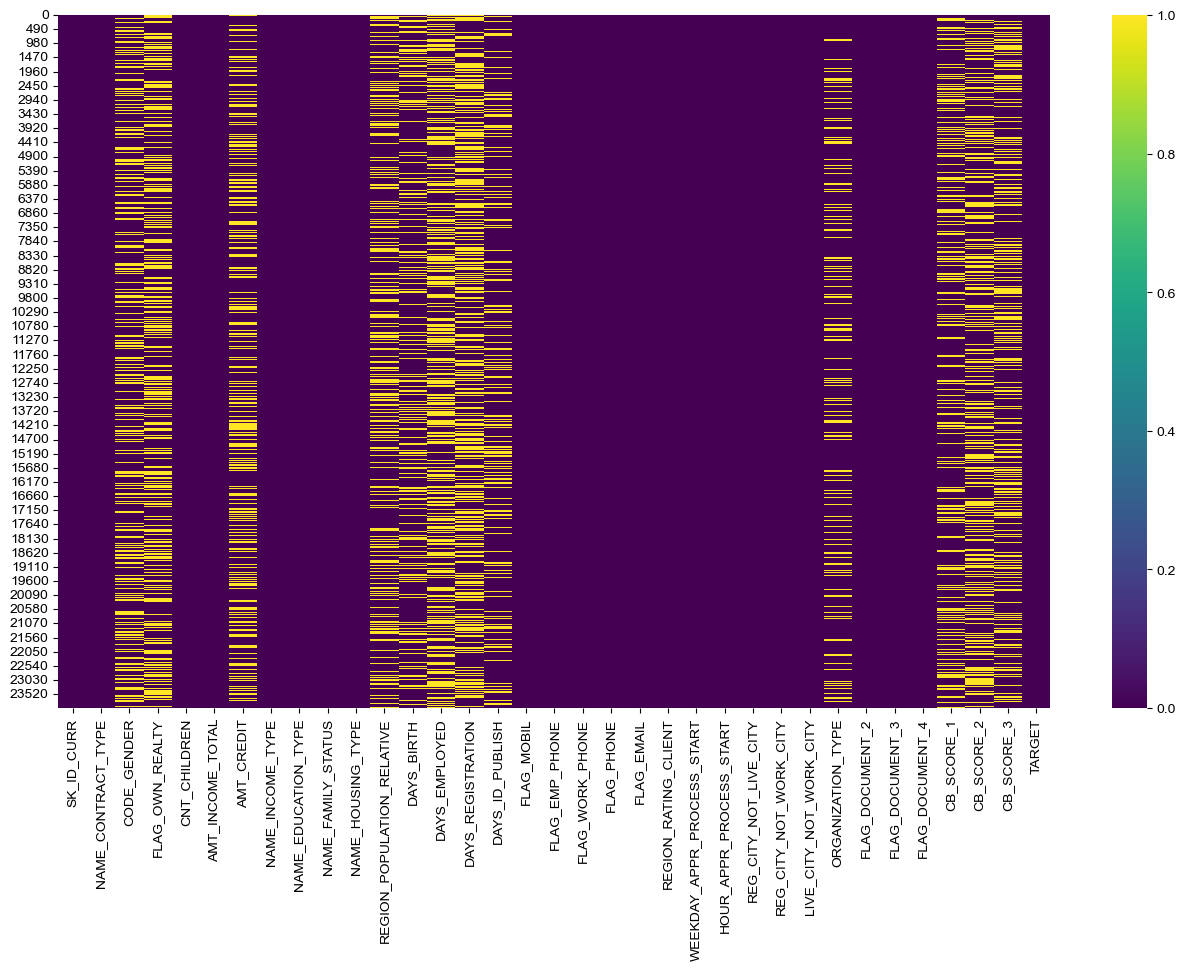

In [24]:
plt.figure(figsize=(16, 9))  # 가로 세로 비율 조정
sns.heatmap(df_adj_mv_2.isnull(), cmap='viridis')
plt.xticks(np.arange(df_adj_mv_2.shape[1])+0.5, df_adj_mv_2.columns.tolist(), rotation=90) # x축 레이블 설정
plt.show()

> #### <font color = lightseagreen> _패턴을 확인할 plot을 구성하였으나 결측치가 있는 컬럼간 패턴이 있는지 유무를 해당 plot으로 확인이 어려움_ </font>
> #### <font color = lightseagreen> _각 컬럼별 결측치 유형이 MCAR일거라 생각됨_ </font>

- #### Missing Indicator Method  

> 결측치(missing values)의 패턴을 분석하는 방법 중 하나. 이 방법은 각 변수(열)에 대해 결측값이 있는지 여부를 나타내는 새로운 이진 변수(binary variable)를 생성  
> 각 변수의 결측치 패턴을 빠르게 파악하거나, 어떤 변수가 결측치 발생과 가장 큰 관련성을 가지는지 확인하는데 유용하게 사용

In [25]:
# 결측치가 있는 컬럼들로만 구성된 데이터프레임
missing_cols = df_adj_mv_2.columns[df_adj_mv_2.isnull().any()].tolist()
df_with_missing_values = df_adj_mv_2[missing_cols]

In [26]:
def missing_indicator_method(df):
        # 각 컬럼별로 결측 여부를 나타내는 새로운 데이터 프레임 생성
    df_nan = df.isnull().astype(int)
    
    results = {}
    
    # 각 컬럼별로 다른 모든 변수들과의 상관 계수 계산
    for col in df.columns:
        corr_matrix = df_nan[[c for c in df.columns if c != col]].corrwith(df_nan[col]).abs()
        
        # 상관 계수가 유의미하게 큰 경우가 있는지 확인
        max_corr = corr_matrix.max()
        
        results[col] = max_corr < 0.05  # 임곗값은 실험적으로 설정
    
    return results

In [27]:
results = missing_indicator_method(df_with_missing_values)

for column, is_mcar in results.items():
    if is_mcar:
        print(f"{column} is likely MCAR")
    else:
        print(f"{column} is likely MAR or NMAR")

CODE_GENDER is likely MCAR
FLAG_OWN_REALTY is likely MCAR
AMT_CREDIT is likely MCAR
REGION_POPULATION_RELATIVE is likely MCAR
DAYS_BIRTH is likely MCAR
DAYS_EMPLOYED is likely MAR or NMAR
DAYS_REGISTRATION is likely MCAR
DAYS_ID_PUBLISH is likely MCAR
ORGANIZATION_TYPE is likely MAR or NMAR
CB_SCORE_1 is likely MCAR
CB_SCORE_2 is likely MCAR
CB_SCORE_3 is likely MCAR


> #### <font color = lightseagreen> _이 방법만으로 MCAR(Missing Completely At Random), MAR(Missing At Random), MNAR(Missing Not At Random) 등 구체적인 결측치 유형을 정확하게 분류하기 어려움_ </font>
> #### <font color = lightseagreen> _정확한 통계적 검증을 위해서는 Little's MCAR Test와 같은 공식적인 통계 검정 방법도 함께 사용_ </font>

- ####  Little's MCAR TEST 및 카이제곱 검정을 통한 결측치 유형 파악하기

- #### 테스트 과정  
> 1. 각 열에 대해 반복문을 실행하며, 해당 열에 결측치가 없으면 해당 열은 테스트에서 제외    
> 2. 해당 열의 데이터 유형이 수치형인지 확인  
> 3. 만약 수치형이라면 Little's MCAR 테스트를 실행  
  -> 주어진 변수의 결측값을 예측하는 선형 회귀 모델을 사용하여, 예측된 값과 실제 평균 사이의 제곱 오차 합을 계산. 이 값이 작다면 (즉, p-value가 크다면), 결측값은 MCAR일 가능성이 높음
> 4. 해당 열의 데이터 유형이 범주형인 경우 카이제곱 검정(chi-square test)를 실행  
  -> 카이제곱 검정은 두 범주형 변수 사이의 독립성을 검정하는 방법. 각 카테고리별로 결측치 여부(결측 있음/없음)를 비교하여 독립성 여부를 확인  
  -> p-value가 0.05보다 작으면 해당 칼럼의 결측치는 완전히 무작위로 발생하지 않았다고 가정할 수 있으므로 MAR 혹은 MNAR로 분류.
> 5. 각 컬럼에 대한 p-value와 Missingness Type(MCAR 혹은 MAR/MNAR) 정보를 결과 딕셔너리에 저장하고 반환

In [28]:
def mcar_test(df):
    results = {}
    
    for col in df.columns:
        if df[col].isnull().sum() == 0: # if no missing values in the column, skip the test.
            continue
            
        if np.issubdtype(df[col].dtype, np.number):
            # 수치형 변수에 대한 Little's MCAR 테스트
            
            other_cols = [c for c in df.columns if c != col and np.issubdtype(df[c].dtype, np.number)]
            missing_rows_in_col = df[col].isnull()

            # 결측치만 있는 경우 건너뛰기
            if missing_rows_in_col.sum() == len(df):
                results[col] = (None, "All values are missing")
                continue
                
            observed_data = df[~missing_rows_in_col][other_cols].select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
            #observed_data = df[~missing_rows_in_col][other_cols].fillna(df.mean())
            
            model=LinearRegression()
            
            model.fit(observed_data,df[~missing_rows_in_col][col])
            
            predicted_missing_values = model.predict(df[missing_rows_in_col][other_cols].fillna(df.select_dtypes(include=[np.number]).mean()))
            #predicted_missing_values=model.predict(df[missing_rows_in_col][other_cols].fillna(df.mean()))
            
            squared_error_sum=np.sum((predicted_missing_values-df[col].mean())**2)
            
            numeric_df = df.select_dtypes(include=[np.number])
            chisq_val = squared_error_sum / (numeric_df.std()**2).sum()
    
            p_value=1-chi2.cdf(x=chisq_val,df=len(predicted_missing_values))
            
        else:
             # 범주형 변수에 대한 카이제곱 검정

            contingency_table = pd.crosstab(df[col], df.isnull().sum(axis=1) > 0)
            _, p_value, _, _ = chi2_contingency(contingency_table)

        # Missingness type determination based on p-value
        if p_value < 0.05:
            missingness_type = "MAR or MNAR"
        else:
            missingness_type = "MCAR"

        results[col] = (p_value, missingness_type)

    return results


# 데이터 로드 및 사용자 정의 인덱스 제거
df_adj_mv_3 = df_adj_mv_2.drop('SK_ID_CURR', axis=1)

results=mcar_test(df_adj_mv_3)

for col,result in results.items():
    p_val, missingness_type = result
    print(f"Column: {col}, p-value: {p_val}, Missingness Type: {missingness_type}")

Column: CODE_GENDER, p-value: 0.09490305081468822, Missingness Type: MCAR
Column: FLAG_OWN_REALTY, p-value: 0.34526513429768724, Missingness Type: MCAR
Column: AMT_CREDIT, p-value: 1.0, Missingness Type: MCAR
Column: REGION_POPULATION_RELATIVE, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_BIRTH, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_EMPLOYED, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_REGISTRATION, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_ID_PUBLISH, p-value: 1.0, Missingness Type: MCAR
Column: ORGANIZATION_TYPE, p-value: 0.05325009856875434, Missingness Type: MCAR
Column: CB_SCORE_1, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_2, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_3, p-value: 1.0, Missingness Type: MCAR


> #### <font color = lightseagreen> _위와 같은 검정을 통해 결측치가 있는 컬럼들 모두 결측치가 완전히 무작위일 가능성(MCAR)이 높으므로_  </font>
> #### <font color = lightseagreen> _MCAR : 딥러닝 등 모델을 통해 결측치 대체가 필요함_  </font>

### 1.6 결측치 대체(추정통계량대체) <a id="s-1.6">

- #### 컬럼별 유효값들을 체크해서 결측치 대체 진행

> #### 결측치를 보이는 컬럼들과 각 컬럼별 결측치 처리를 아래와 같이 진행하고자 함  
<font color =red> 카테고리 형태의 컬럼들의 결측치는 최빈값, 그외 일반적인 숫자형은 중앙값으로 대체 _(일반적인 Missing Value Imputation 방법)_</font>  
__1. 성별(code_gender)__ : <font color =bluesky> 최빈값 </font>  
__2. 자가부동산보유여부(flag_own_realty)__ : <font color =bluesky>최빈값 </font>  
__3. 신용대출금액(amt_credit)__ : <font color =bluesky>중앙값 </font>   
__4. 결혼상태 (NAME_FAMILY_STATUS)__ : <font color =bluesky>최빈값 </font>   
__5. 거주 지역의 표준화된 인구(region_population_relative)__ : <font color =bluesky>중앙값 </font>  
__6. 대출 신청 시점에서의 일단위 나이(기준 시점 대비 상대적인 시간) (days_birth)__ : <font color =bluesky>중앙값 </font>  
__7. 대출 신청 시점에서의 고객의 근무일수(기준 시점 대비 상대적인 시간)(days_employed)__ :  <font color =bluesky>중앙값 </font>  
__8. 대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_registration)__ : <font color =bluesky>중앙값 </font>  
__9. 대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_id_publish)__ : <font color =bluesky>중앙값 </font>   
__10. 근무회사 유형 (ORGANIZATION_TYPE)__ :  <font color =bluesky>최빈값 </font>  
__11. 신용점수1(cb_score_1)__ :<font color =bluesky> 중앙값</font>  
__12. 신용점수2(cb_score_2)__ :  <font color =bluesky>중앙값</font>  
__13. 신용점수3(cb_score_3)__ : <font color =bluesky>중앙값</font>  

- #### 결측치 처리 진행

In [29]:
fill_methods = {
    'CODE_GENDER': 'mode',
    'FLAG_OWN_REALTY' : 'mode',
    'AMT_CREDIT':'median',
    'NAME_FAMILY_STATUS': 'mode',
    'REGION_POPULATION_RELATIVE':'median',
    'DAYS_BIRTH':'median',
    'DAYS_EMPLOYED':'median',
    'DAYS_REGISTRATION':'median',
    'DAYS_ID_PUBLISH':'median',
    'ORGANIZATION_TYPE':'mode',
    'CB_SCORE_1':'median',
    'CB_SCORE_2':'median',
    'CB_SCORE_3':'median'
}

df_adj_mv_fill = replace_missing_values(df_adj_mv,fill_methods)
df_adj_mv_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 24000 non-null  object 
 3   FLAG_OWN_REALTY             24000 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  24000 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  24000 non-null  float64
 12  DAYS_BIRTH                  24000 non-null  float64
 13  DAYS_EMPLOYED               240

In [81]:
df_adj_mv_fill.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,510853.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,49.894802,57.935604,58.349224,1
1,100004,Revolving loans,F,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018850,-19046.0,-1650.0,-4260.0,-2531.0,1,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.0,-1650.0,-4521.0,-3866.0,1,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,49.894802,63.496369,59.971539,0
3,100029,Cash loans,M,N,2,135000.0,510853.5,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.0,-746.0,-108.0,-3251.0,1,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,F,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,-15731.0,-475.0,-4521.0,-513.0,1,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,57.935604,59.971539,0


### 1.7 결측치 대체(DL) <a id="s-1.7">

- #### 딥러닝을 통한 결측치 대체 진행

> #### 딥러닝을 적용할 데이터프레임 불러오기  
> #### 더 많은 학습 데이터 확보를 위해 널(Null)값이 아닌 XNA, Unknown으로 되어 있는 유효값들을 Null로 처리하지 않음.  
> #### 해당 유효값들을 Null로 처리시 학습대상이 아닌 예측대상이 되기 때문

- #### 원본 데이터 불러오기 / 식별키 제외

In [31]:
#data = data.replace(['NaN', 'nan', 'XNA','Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)


In [32]:
# 'SK_ID_CURR' 컬럼 직접 제거
#? 즉 variance가 0인 컬럼은 모델 학습에 도움이 되지 않기에 FLAG_MOBIL 제거
data.drop(columns=['SK_ID_CURR','FLAG_MOBIL'], inplace=True)#,'FLAG_MOBIL'

- #### 딥러닝 Input 데이터 분류

In [33]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

- #### 최종 결측치 컬럼 확인

In [34]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 패턴을 찾아 채우기

In [35]:

from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
            #mode_result = stats.mode(df[col])
            #fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [36]:
# 결측치가 한개인 컬럼은 최빈값으로 대체

data = data.replace(['Unknown'], np.nan)

fill_methods = {

    'NAME_FAMILY_STATUS': 'mode',

}

data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 변수 타입 변경

In [37]:
data = data.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object }) #'FLAG_MOBIL': object,

- #### 딥러닝 Input 데이터 분류

In [38]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values
    
    

In [39]:
numeric_columns,categorical_columns,missing_values = columns_classification(data)

total_columns : 33
numeric_columns : 5
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 17
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']


- #### 딥러닝 예측함수 정의(범주형)

In [40]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 ):
    
    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 성별 전용
    if target_col_val == 'CODE_GENDER':
        data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    if target_col_val == 'ORGANIZATION_TYPE':
        data_with_missing.loc[data_with_missing['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.nan
        
    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()



    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)

    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]
    
    output_dim = data_with_missing[target_col_val].nunique()
    print(output_dim)

    model = tf.keras.Sequential([ #창석
    tf.keras.layers.Input(shape=(input_dim,)),#창석
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용#창석
    ])#창석
    
    #model = tf.keras.Sequential([
    #    tf.keras.layers.Input(shape=(input_dim,)),
    #    tf.keras.layers.Dense(128, activation='relu'),
    #    tf.keras.layers.Dense(65, activation='relu'),
    #    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #    tf.keras.layers.Dense(32, activation='relu'),
    #    tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용
    #])
    
    
    model.compile(optimizer='adam',#창석
              loss='categorical_crossentropy',#창석
              metrics=['accuracy'])#창석
    


    #model.compile(optimizer='rmsprop',
    #              loss='categorical_crossentropy',
    #              metrics=['accuracy'])


    # 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

    # LabelEncoder 객체 생성 및 학습
    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
    integer_encoded_labels



    one_hot_train_labels = to_categorical(integer_encoded_labels)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])
    

    
    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()


    original_label=np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


    print(data_with_fill.loc[missing_data_index, target_column].head())
    return data_with_fill
    

- #### 딥러닝 예측함수 정의(수치형)

In [41]:
from tensorflow.keras.regularizers import l2

def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2' ,epochs_val=30, batch_size_val=32 ):

    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()


    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)


    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]




    #model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(input_dim,)),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(65, activation='relu'),
    #tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    #])
       
    #model.compile(optimizer='adam',
    #              loss='mean_squared_error',
    #              metrics=['mean_squared_error'])
    
    #model = tf.keras.Sequential([ # 창석 230918
    #    tf.keras.layers.Input(shape=(input_dim,)), # 창석 230918
    #    tf.keras.layers.Dense(256, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dense(128, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dropout(0.5), # 창석 230918
    #    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001,l2=0.001)), # 창석 230918
    #    tf.keras.layers.Dropout(0.5), # 창석 230918
    #    tf.keras.layers.Dense(32, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dense(1) # 창석 230918
    #]) # 창석 230918
    



    #model.compile(optimizer=tf.optimizers.Adam(lr=0.0005), #창석 230918
    #              loss='mean_squared_error', #창석 230918
    #              metrics=['mean_squared_error']) #창석 230918
    
    
    
    
    # 기존 준이 모델 -
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])

    # 모델 구성

    # 모델 생성
    #model = Sequential([
    #Dense(128, activation='relu', input_shape=(input_dim,)),
    #Dense(64, activation='relu'),
    #Dropout(0.5),  
    #Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    #Dropout(0.5),
    #Dense(1, activation='linear')  
    #])

    # 모델 컴파일
    #model.compile(optimizer=Adam(learning_rate=0.0005),
    #              loss='mean_squared_error',
    #              metrics=['mean_squared_error'])




    # Prepare target data
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    # Scale target data using a new scaler
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    #early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # 창석 230918
    
    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val,  verbose=2,callbacks=[early_stopping_cb])


    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()


    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values
    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    

- #### 결측치 채우기  

> #### 데이터를 채우면서, 예측값 여부 컬럼을 추가적으로 생성함. 예측한 컬럼을 다음예측에 사용했을 경우에도 성능상 큰 차이는 없음

total_columns : 33
numeric_columns : 5
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 17
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
2
Epoch 1/50
423/423 - 1s - loss: 1.3027 - accuracy: 0.6867 - val_loss: 0.7066 - val_accuracy: 0.6897 - 598ms/epoch - 1ms/step
Epoch 2/50
423/423 - 0s - loss: 0.6482 - accuracy: 0.7104 - val_loss: 0.6290 - val_accuracy: 0.7140 - 325ms/epoch - 768us/step
Epoch

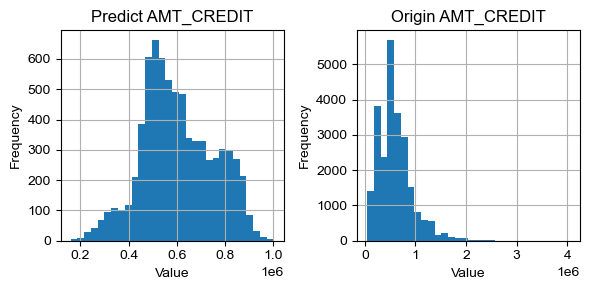

total_columns : 36
numeric_columns : 6
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 22
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 8
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
16851
Epoch 1/50
422/422 - 0s - loss: 0.8240 - mean_squared_error: 0.7472 - val_loss: 0.6449 - val_mean_squared_error: 0.5755 - 486ms/epoch - 1ms/step
Epoch 2/50
422/4

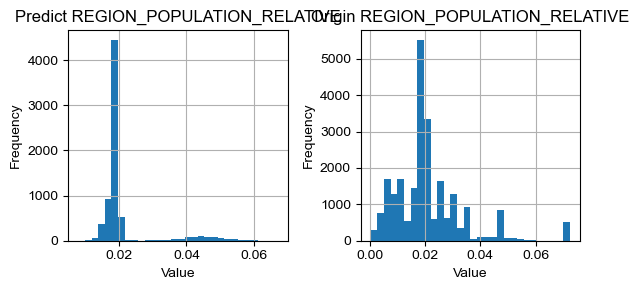

total_columns : 37
numeric_columns : 7
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag']
missing_values : 7
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
19251
Epoch 1/50
482/482 - 1s - loss: 0.7769 - mean_squared_error: 0.7021 - val_loss: 0.6066 - val_mean_squared_error: 0.5

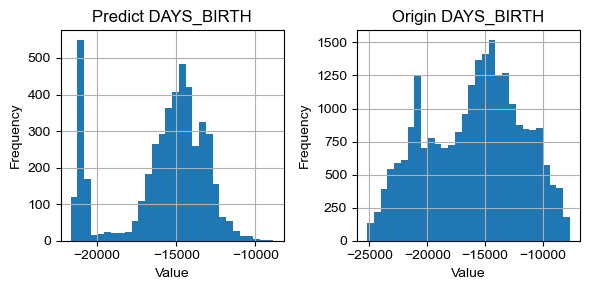

total_columns : 38
numeric_columns : 8
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 24
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 6
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
13852
Epoch 1/50
347/347 - 0s - loss: 1.0310 - mean_squared_error: 0.9586 - val_loss: 0.9041 

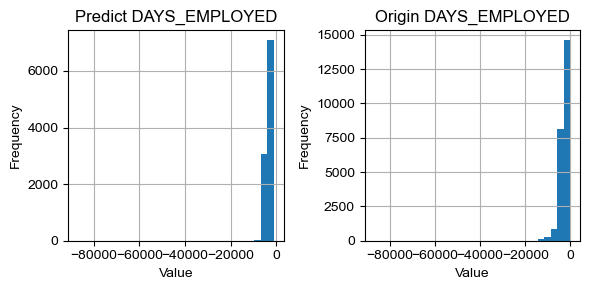

total_columns : 39
numeric_columns : 9
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 25
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 5
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
14267
Epoch 1/50
357/357 - 1s - loss: 1.0346 - mean_squared_e

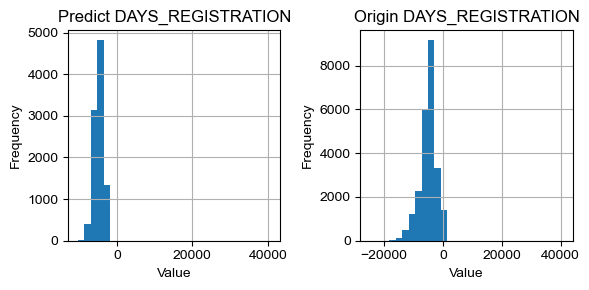

total_columns : 40
numeric_columns : 10
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 26
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 4
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
19259
Epoch 1/50
482/482

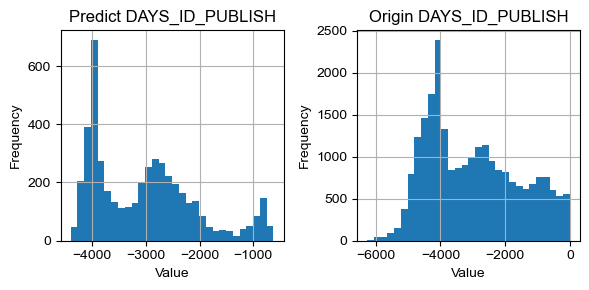

total_columns : 41
numeric_columns : 11
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 27
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 3
['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_

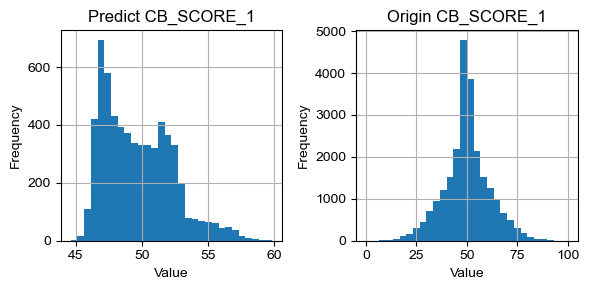

total_columns : 42
numeric_columns : 12
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag']
missing_values 

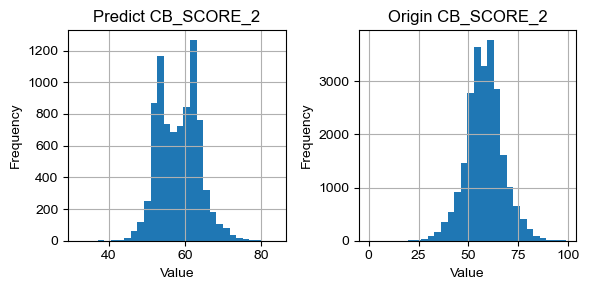

total_columns : 43
numeric_columns : 13
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', '

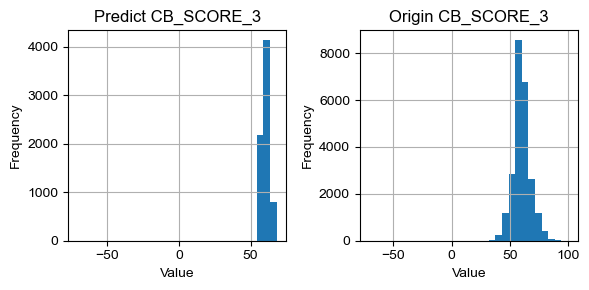

In [42]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=50, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=50, batch_size_val=32 )

FILLED_DATA.loc[FILLED_DATA['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = np.nan

for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=50, batch_size_val=32 )

 

In [43]:
# OG_TYPE 예측 
FILLED_DATA = FILLED_DATA.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

FILLED_DATA = FILLED_DATA.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object})

numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='ORGANIZATION_TYPE' ,epochs_val=50, batch_size_val=32 )

total_columns : 44
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', 'CB_SCOR

- #### 결측치채운 최종 dataset 

> #### 기존 결측치 여부를 판별하는 컬럼 추가

In [97]:
FILLED_DATA.shape

(24000, 45)

In [98]:
FILLED_DATA.head(15)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET,CODE_GENDER_predicted_flag,FLAG_OWN_REALTY_predicted_flag,AMT_CREDIT_predicted_flag,REGION_POPULATION_RELATIVE_predicted_flag,DAYS_BIRTH_predicted_flag,DAYS_EMPLOYED_predicted_flag,DAYS_REGISTRATION_predicted_flag,DAYS_ID_PUBLISH_predicted_flag,CB_SCORE_1_predicted_flag,CB_SCORE_2_predicted_flag,CB_SCORE_3_predicted_flag,ORGANIZATION_TYPE_predicted_flag
0,Cash loans,M,Y,0,202500.0,5.798373e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.000000,-637.000000,-3648.000000,-2120.000000,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,55.480659,56.734550,58.349224,1,N,N,Y,N,N,N,N,N,Y,Y,N,N
1,Revolving loans,F,Y,0,67500.0,1.350000e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-19046.000000,-3787.381348,-4260.000000,-2531.000000,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0,Y,Y,N,Y,N,Y,N,N,N,N,N,N
2,Cash loans,M,N,0,108000.0,5.096025e+05,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.000000,-2041.984863,-3957.876221,-3866.000000,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,49.161400,63.496369,59.140194,0,N,N,N,N,N,Y,Y,N,Y,N,Y,N
3,Cash loans,M,N,2,135000.0,5.887137e+05,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.000000,-746.000000,-108.000000,-2671.416748,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0,N,N,Y,N,N,N,N,Y,N,N,N,N
4,Cash loans,M,Y,0,202500.0,6.041520e+05,Working,Secondary / secondary special,Married,House / apartment,0.009175,-15452.553711,-475.000000,-5262.549316,-513.000000,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,56.678852,59.087181,0,Y,N,N,N,Y,N,Y,N,N,Y,Y,N
5,Cash loans,M,Y,0,360000.0,1.506816e+06,Working,Secondary / secondary special,Married,House / apartment,0.010006,-18264.000000,-9523.000000,-5504.000000,-1797.000000,1,0,0,0,2,THURSDAY,10,0,1,1,Transport: type 2,0,1,0,38.358614,47.467175,64.024109,0,Y,N,N,N,N,N,N,N,N,N,Y,N
6,Cash loans,F,Y,2,225000.0,3.140550e+05,Commercial associate,Higher education,Married,House / apartment,0.006629,-10473.000000,-1392.000000,-2025.000000,-2271.524658,1,0,0,0,2,THURSDAY,3,1,1,0,Self-employed,0,1,0,49.352928,61.701918,58.566944,0,N,N,N,N,N,N,N,Y,Y,N,Y,N
7,Cash loans,F,Y,2,202500.0,7.963965e+05,Working,Higher education,Married,House / apartment,0.008019,-15909.000000,-2973.166748,-3134.000000,-4180.000000,1,0,0,1,2,FRIDAY,17,0,1,1,Industry: type 11,0,1,0,49.904756,53.707546,59.403718,0,Y,N,N,N,N,Y,N,N,N,Y,N,N
8,Cash loans,M,N,1,126000.0,3.270240e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.020855,-12953.990234,-192.000000,-6913.000000,-5942.000000,1,0,1,0,2,SUNDAY,13,0,0,0,Transport: type 4,0,1,0,52.681004,62.943554,64.084047,0,Y,N,N,Y,Y,N,N,N,Y,Y,N,N
9,Cash loans,F,N,0,126000.0,2.636865e+05,Pensioner,Secondary / secondary special,Married,House / apartment,0.009549,-21613.000000,-5476.014160,-6944.372070,-4015.191895,0,0,1,0,2,MONDAY,11,0,0,0,Medicine,0,0,0,37.482198,69.266436,65.553303,0,N,N,N,N,N,Y,Y,Y,N,N,N,Y


## 2. 데이터 시각화  <a id="s-2">

1. 변수 간 상관 관계: 변수들 사이의 상관 관계를 조사하여 어떤 변수가 다른 변수와 연관되어 있는지 파악. 상관 행렬(correlation matrix), 산점도(scatter plot), 히트맵(heatmap) 등을 사용하여 시각화.
2. 시각화: 그래프나 차트를 생성하여 데이터 패턴과 인사이트를 시각적으로 파악. 막대 그래프(bar plot), 히스토그램(histogram), 상자 그림(box plot), 선 그래프(line plot), 산점도(scatter plot) 등 다양한 시각화 기법이 활용.
3. 가설 설정 및 검증: EDA 결과를 바탕으로 가설(Hypothesis)을 설정하고 검증하는 단계로 진행.
4. EDA는 독립적인 분석 단계로서만 수행되는 것이 아니라 전체 데이터 과학 프로세스에서 반복적으로 활용. EDA 결과에 따라 추가적인 전처리 작업이나 모델링 방법 선택에 영향. 탐색적 데이터 분석은 주어진 문제에 대한 인사이트 발견과 잠재된 문제 해결 방법 동일성 발견 및 가정 검증 가능성 제공하여 실전 모델링 단게에서 유용.

### 2-1. 데이터 유형 구분  <a id="s-2.1">

In [99]:
data1 = FILLED_DATA.copy()
#data1.head()
data1.dtypes

NAME_CONTRACT_TYPE                            object
CODE_GENDER                                   object
FLAG_OWN_REALTY                               object
CNT_CHILDREN                                   int64
AMT_INCOME_TOTAL                             float64
AMT_CREDIT                                   float64
NAME_INCOME_TYPE                              object
NAME_EDUCATION_TYPE                           object
NAME_FAMILY_STATUS                            object
NAME_HOUSING_TYPE                             object
REGION_POPULATION_RELATIVE                   float64
DAYS_BIRTH                                   float64
DAYS_EMPLOYED                                float64
DAYS_REGISTRATION                            float64
DAYS_ID_PUBLISH                              float64
FLAG_EMP_PHONE                                object
FLAG_WORK_PHONE                               object
FLAG_PHONE                                    object
FLAG_EMAIL                                    

In [100]:
#data1['TARGET'] = data1['TARGET'].astype(str)
#data1['HOUR_APPR_PROCESS_START'] = data1['HOUR_APPR_PROCESS_START'].astype(str)

In [101]:
normal_categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4']
long_categorical_features = ['ORGANIZATION_TYPE']
time_features = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
key_features = ['SK_ID_CURR','FLAG_MOBIL'] # 무의미한 식별키 및 단일값 컬럼은 제외
target_features = ['TARGET']
flag_features =['CODE_GENDER_predicted_flag',
 'FLAG_OWN_REALTY_predicted_flag',
 'AMT_CREDIT_predicted_flag',
 'REGION_POPULATION_RELATIVE_predicted_flag',
 'DAYS_BIRTH_predicted_flag',
 'DAYS_EMPLOYED_predicted_flag',
 'DAYS_REGISTRATION_predicted_flag',
 'DAYS_ID_PUBLISH_predicted_flag',
 'CB_SCORE_1_predicted_flag',
 'CB_SCORE_2_predicted_flag',
 'CB_SCORE_3_predicted_flag',
 'ORGANIZATION_TYPE_predicted_flag']
# Combine all non-numerical features into one list
non_numerical_features = normal_categorical_features +long_categorical_features +time_features + key_features + target_features + flag_features

# Select numerical features by excluding non-numerical ones
numerical_features = [col for col in data1.columns if col not in non_numerical_features]
numerical_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 시각화 자료 내 텍스트 한글화

### 2-2. 타겟변수 파악  <a id="s-2.2">

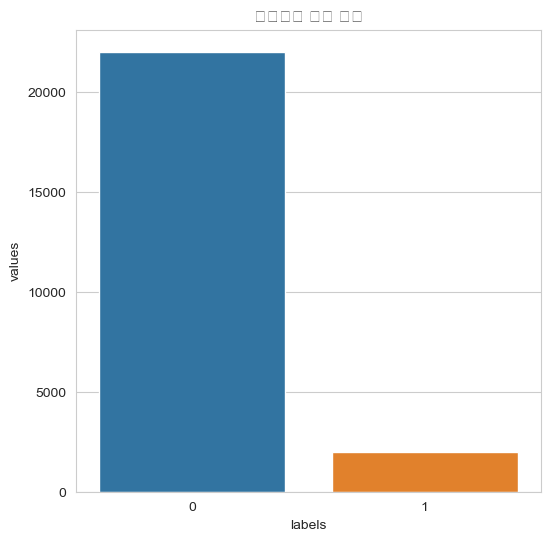

In [102]:
temp = data1["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('연체유무 건수 현황')#'Payment Delayed - train data')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

> #### _<font color = lightseagreen>  0에 해당되는 계좌 : 대출분할 지불이 한번이라도 지연되지 않은 정상 계좌 건. </font>_
> #### _<font color = lightseagreen>  1에 해당되는 계좌 : 지불 지연이 한번이라도 발생된 계좌 건 </font>_  
> #### _<font color = lightseagreen>  각각 계좌건의 상태 별로 특정 변수들과 비추었을때 분포가 어떠한지 파악할 필요가 있음 </font>_

In [103]:
for i, feature in enumerate(normal_categorical_features):
    print(i,feature)

0 NAME_CONTRACT_TYPE
1 CODE_GENDER
2 FLAG_OWN_REALTY
3 CNT_CHILDREN
4 NAME_INCOME_TYPE
5 NAME_EDUCATION_TYPE
6 NAME_FAMILY_STATUS
7 NAME_HOUSING_TYPE
8 FLAG_EMP_PHONE
9 FLAG_WORK_PHONE
10 FLAG_PHONE
11 FLAG_EMAIL
12 REGION_RATING_CLIENT
13 REG_CITY_NOT_LIVE_CITY
14 REG_CITY_NOT_WORK_CITY
15 LIVE_CITY_NOT_WORK_CITY
16 FLAG_DOCUMENT_2
17 FLAG_DOCUMENT_3
18 FLAG_DOCUMENT_4


In [114]:
data1['NAME_CONTRACT_TYPE'].value_counts().index.tolist()

['Cash loans', 'Revolving loans']

### 2-3. 시각화 함수 구성  <a id="s-2.3">

1. 범주형 변수에 대한 바플랏 (plot_stats_f)
2. organization 변수 top 카테고리 플랏 (plot_top_categories)
3. 단순 & 그룹별 히스토그램 & 박스플랏 (plot_histogram_boxplot)
4. 시간 & 요일에 대한 heatmaps (plot_heatmaps)
5. 결측치 방법론들 판별짓는 EDA
6. grouping을 위한 EDA

- #### Bar plot (count 및 타겟 여부 ratio) - 범주형 컬럼에 적용

In [98]:
def plot_stats_v(df, feature_list):
    nrows = len(feature_list)

    for i, feature in enumerate(feature_list):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Adjust the size of the graph based on categories

        fig.suptitle(f"Count plot and Bar chart by Target for {feature}")

        # Get a list of unique categories sorted by their counts in descending order
        category_order = df[feature].value_counts().index.tolist()

        # Count plot for the feature by TARGET
        count_plot = sns.countplot(x=feature if len(df[feature].unique()) <= 4 else None,
                                   y=None if len(df[feature].unique()) <= 4 else feature,
                                   hue='TARGET', data=df,
                                   order=category_order,
                                   ax=ax[0], palette=['skyblue', 'orange'])

        # Percentage of each category by TARGET
        df_grouped = df.groupby([feature])['TARGET'].value_counts(normalize=True).rename('percentage(%)').reset_index()
        df_grouped['percentage(%)'] = df_grouped['percentage(%)'] * 100

        bar_chart_df = pd.DataFrame(columns=['Category', 'Target_0_Percentage', 'Target_1_Percentage'])
       
        for j, category in enumerate(category_order):
            temp_df = df_grouped[df_grouped[feature] == category]
            target_0_percentage_values = temp_df[temp_df['TARGET']==0]['percentage(%)'].values
            target_1_percentage_values = temp_df[temp_df['TARGET']==1]['percentage(%)'].values
            
            target_0_percentage = target_0_percentage_values[0] if len(target_0_percentage_values) > 0 else 0
            target_1_percentage = target_1_percentage_values[0] if len(target_1_percentage_values) > 0 else 100 - target_0_percentage
            
            bar_chart_df.loc[j] =[category,target_0_percentage,target_1_percentage]
        
        category_order2 = df[feature].value_counts().index.tolist()[::-1]
        
        bar_chart_sorted=bar_chart_df.set_index('Category').loc[category_order].reset_index()
        bar_chart_sorted2=bar_chart_df.set_index('Category').loc[category_order2].reset_index()

        if len(bar_chart_sorted["Category"].unique()) > 4:
            bars = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_0_Percentage"], color='skyblue')
            bars2 = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_1_Percentage"], left=bar_chart_sorted2["Target_0_Percentage"] ,color='orange')
            # If the categories are binary (0, 1), adjust y-ticks
            if set(bar_chart_sorted2['Category'].unique()).issubset({0, 1}):
                plt.yticks([0, 1])
        else:
            bars = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_0_Percentage"] ,color='skyblue')
            bars2 = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_1_Percentage"], bottom=bar_chart_sorted["Target_0_Percentage"] ,color='orange')
             # If the categories are binary (0, 1), adjust x-ticks
            if set(bar_chart_sorted['Category'].unique()).issubset({0, 1}):
                plt.xticks([0, 1])

        ax[1].set_xlabel('Percentage')

    plt.tight_layout(pad=3.03)
    plt.show();

In [76]:
#수진

In [144]:
def plot_stats_v(df, feature_list):
    nrows = len(feature_list)

    for i, feature in enumerate(feature_list):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Adjust the size of the graph based on categories

        # Get a list of unique categories sorted by their counts in descending order
        category_order = df[feature].value_counts().index.tolist()

        # Count plot for the feature by TARGET
        count_plot = sns.countplot(x=feature if len(df[feature].unique()) <= 4 else None,
                                   y=None if len(df[feature].unique()) <= 4 else feature,
                                   hue='TARGET', data=df,
                                   order=category_order,
                                   ax=ax[0], palette=['skyblue', 'orange'])

        ax[0].set_title(f'{column}({column_info[column]}) 도수분포표')
        ax[0].set_xlabel(' ')
        ax[0].set_ylabel(' ')

        # Percentage of each category by TARGET
        df_grouped = df.groupby([feature])['TARGET'].value_counts(normalize=True).rename('percentage(%)').reset_index()
        df_grouped['percentage(%)'] = df_grouped['percentage(%)'] * 100

        bar_chart_df = pd.DataFrame(columns=['Category', 'Target_0_Percentage', 'Target_1_Percentage'])
       
        for j, category in enumerate(category_order):
            temp_df = df_grouped[df_grouped[feature] == category]
            target_0_percentage_values = temp_df[temp_df['TARGET']==0]['percentage(%)'].values
            target_1_percentage_values = temp_df[temp_df['TARGET']==1]['percentage(%)'].values
            
            target_0_percentage = target_0_percentage_values[0] if len(target_0_percentage_values) > 0 else 0
            target_1_percentage = target_1_percentage_values[0] if len(target_1_percentage_values) > 0 else 100 - target_0_percentage
            
            bar_chart_df.loc[j] =[category,target_0_percentage,target_1_percentage]
        
        category_order2 = df[feature].value_counts().index.tolist()[::-1]
        
        bar_chart_sorted=bar_chart_df.set_index('Category').loc[category_order].reset_index()
        bar_chart_sorted2=bar_chart_df.set_index('Category').loc[category_order2].reset_index()

        if len(bar_chart_sorted["Category"].unique()) > 4:
            bars = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_0_Percentage"], color='skyblue')
            bars2 = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_1_Percentage"], left=bar_chart_sorted2["Target_0_Percentage"] ,color='orange')
            # If the categories are binary (0, 1), adjust y-ticks
            if set(bar_chart_sorted2['Category'].unique()).issubset({0, 1}):
                plt.yticks([0, 1])
        else:
            bars = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_0_Percentage"] ,color='skyblue')
            bars2 = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_1_Percentage"], bottom=bar_chart_sorted["Target_0_Percentage"] ,color='orange')
             # If the categories are binary (0, 1), adjust x-ticks
            if set(bar_chart_sorted['Category'].unique()).issubset({0, 1}):
                plt.xticks([0, 1])

        ax[1].set_title(f'{column}({column_info[column]}) 구성 비율')
        ax[1].set_xlabel(' ')
        ax[1].set_ylabel(' ')

    plt.tight_layout(pad=3.03)
    plt.show();

- #### Histogram / Box plot - 수치형 컬럼에 적용

In [129]:
def plot_histogram_boxplot(df, columns):
    sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일
    custom_palette = ["blue", "red"]

    for column in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

        # 히스토그램 그리기
        sns.histplot(data=df, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
        axes[0].set_title(f'Histogram of {column} by TARGET')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')

        # 상자 그림 그리기
        sns.boxplot(data=df, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
        axes[1].set_title(f'Boxplot of {column} by TARGET')
        axes[1].set_xlabel('TARGET')
        axes[1].set_ylabel(column)

        plt.tight_layout()
        plt.show()

In [149]:
def plot_histogram_boxplot(df, columns, group_option):
    sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일
    custom_palette = ["navy", "blue"]

    for column in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        # 히스토그램 그리기
        if group_option == True : 
            sns.histplot(data=df, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
        else : 
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], palette=custom_palette)
    
        axes[0].set_title(f'{column}({column_info[column]})의 데이터 분포')
        axes[0].set_xlabel(' ')
        axes[0].set_ylabel('빈도')

        # 상자 그림 그리기
        if group_option == True : 
            sns.boxplot(data=df, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
        else : 
            sns.boxplot(data=df, y=column, ax=axes[1], palette=custom_palette)    
        
        axes[1].set_title(f'연체그룹별 {column}({column_info[column]})의 상자 그림')
        axes[1].set_xlabel(' ')
        axes[1].set_ylabel(' ')

        plt.tight_layout()
        plt.show()

In [155]:
def plot_top_categories(df, feature, target='TARGET', top_n=20):
    # Get top categories by count
    top_categories = df[feature].value_counts().index[:top_n]

    # Filter dataframe to include only top categories
    df_top_categories = df[df[feature].isin(top_categories)]

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    
    # Plot countplot for the feature by TARGET (right)
    sns.countplot(data=df_top_categories,
                  y=feature,
                  hue=target,
                  order=top_categories,
                  ax=axes[0],
                  palette=['skyblue', 'orange'])

    axes[0].set_title(f'Count of {feature} by {target}')
    
    # Calculate and plot percentage of each category by TARGET (left)
    grouped = (df_top_categories.groupby(feature)[target]
               .value_counts(normalize=True)
               .rename('percentage')
               .mul(100)
               .reset_index()
               .sort_values(feature))
    
    sns.barplot(x="percentage", y=feature, hue=target, data=grouped,
                order=top_categories,
                ax=axes[1],
                palette=['skyblue', 'orange'])

    axes[1].set_title(f'Percentage of {target} in each {feature}')



In [183]:
def plot_heatmaps(df, day_feature, hour_feature, target='TARGET'):
    # Create a pivot table for the counts heatmap
    pivot_counts = df.pivot_table(index=day_feature,
                                  columns=hour_feature,
                                  values=target,
                                  aggfunc='count')

    # Create a pivot table for the TARGET=1 ratio heatmap
    pivot_ratio = df[df[target] == '1'].pivot_table(index=day_feature,
                                                  columns=hour_feature,
                                                  values=target,
                                                  aggfunc='count') / pivot_counts

    # Reorder index (days of week) from Monday to Sunday
    days_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    
    pivot_counts = pivot_counts.reindex(days_order)
    pivot_ratio = pivot_ratio.reindex(days_order)*100

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

    # Plot counts heatmap
    sns.heatmap(pivot_counts.fillna(0),
                ax=axes[0],
                cmap="Blues",
                annot=True,
                fmt=".0f")  # Use no decimal places
    
    axes[0].set_title('Counts Heatmap')

     # Plot TARGET=1 ratio heatmap
    sns.heatmap(pivot_ratio.fillna(0),
               ax=axes[1],
               cmap="Blues",
               annot=True,
               fmt=".2f")  # Use two decimal places

    axes[1].set_title('TARGET 1 Ratio Heatmap')
    
    # 요일과 시간에 따른 y 값의 평균 계산
    plotdf = data.groupby([day_feature, hour_feature])[target].mean().unstack()*100

    sns.heatmap(plotdf, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

    # 축 레이블 설정
    axes[2].set_xlabel('Hour')
    axes[2].set_ylabel('Day of Week')

    # 플롯 출력
    plt.show()    

In [168]:
def plot_heatmaps(df, day_feature, hour_feature, target='TARGET'):
    # Create a pivot table for the counts heatmap
    pivot_counts = df.pivot_table(index=day_feature,
                                  columns=hour_feature,
                                  values=target,
                                  aggfunc='count')

    # Create a pivot table for the TARGET=1 ratio heatmap
    pivot_ratio = df[df[target] == '1'].pivot_table(index=day_feature,
                                                  columns=hour_feature,
                                                  values=target,
                                                  aggfunc='mean')

    # Reorder index (days of week) from Monday to Sunday
    days_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    
    pivot_counts = pivot_counts.reindex(days_order)
    pivot_ratio = pivot_ratio.reindex(days_order)*100

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

    # Plot counts heatmap
    sns.heatmap(pivot_counts.fillna(0),
                ax=axes[0],
                cmap="Blues",
                annot=True,
                fmt=".0f")  # Use no decimal places
    
    axes[0].set_title('Counts Heatmap')

     # Plot TARGET=1 ratio heatmap
    sns.heatmap(pivot_ratio.fillna(0),
               ax=axes[1],
               cmap="Blues",
               annot=True,
               fmt=".2f")  # Use two decimal places

    axes[1].set_title('TARGET 1 Ratio Heatmap')
    
    # Calculate the mean of y values for each day and hour
    plotdf = df.groupby([day_feature, hour_feature])[target].mean().unstack()*100

    sns.heatmap(plotdf, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, ax=axes[2])

    # Set axis labels
    axes[2].set_xlabel('Hour')
    axes[2].set_ylabel('Day of Week')

    # Show the plot
    plt.show()

- #### Strip plot 함수

In [104]:
def plot_stripplot(df, feature, target, color):
    plt.figure(figsize=(10,6))
    plt.title("Strip plot of %s by Target" % feature)

    # Plot a strip plot of the feature for each value of the target variable
    sns.stripplot(x=target, y=feature, data=df,
                  jitter=True,
                  palette=color)

    # Disable scientific notation 
    plt.ticklabel_format(style='plain', axis='y')

    plt.show();

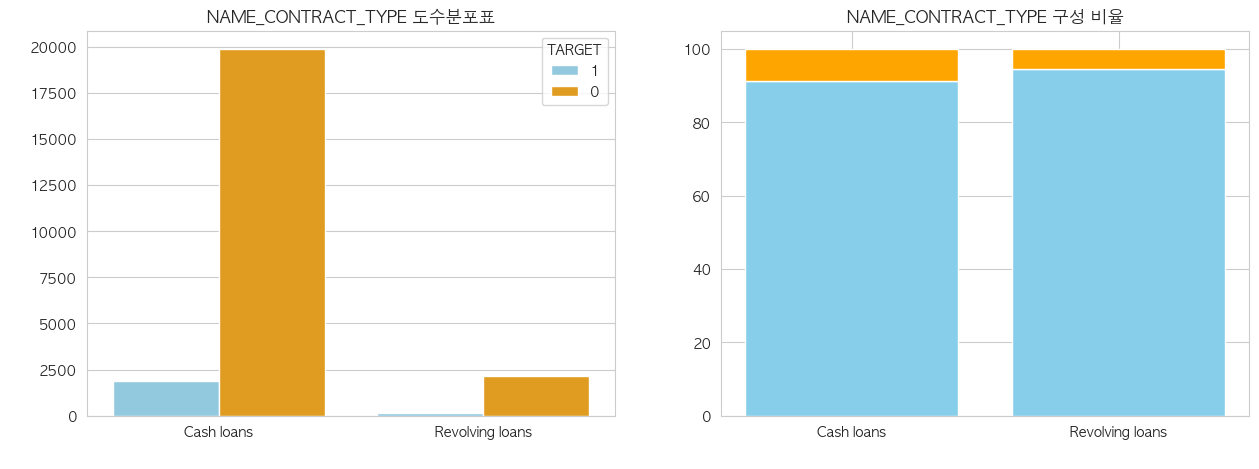

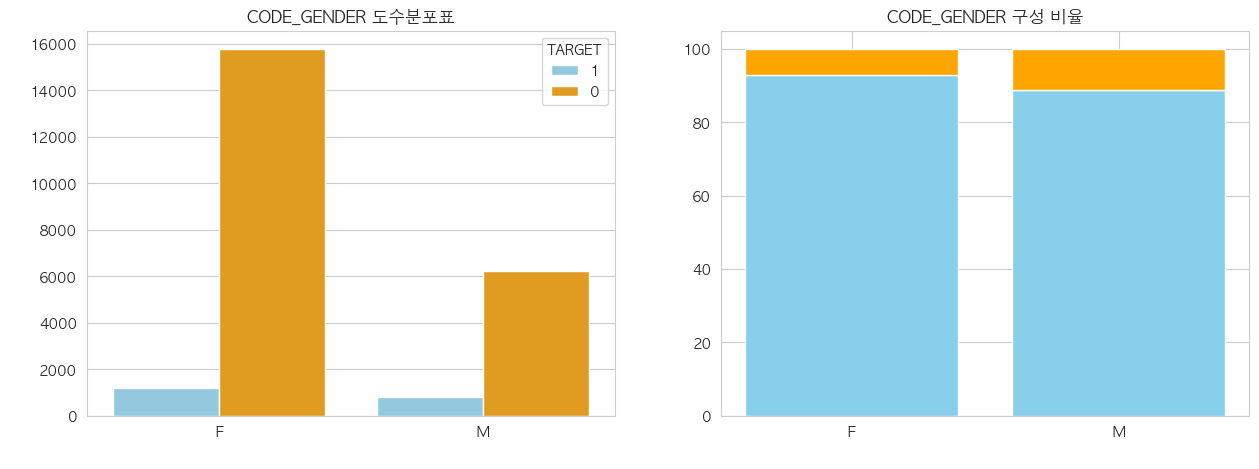

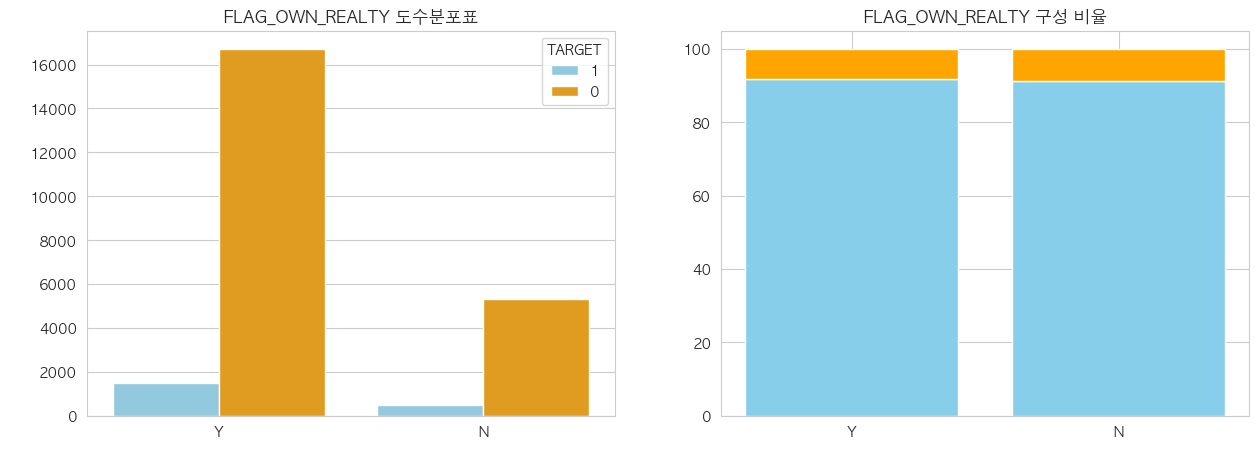

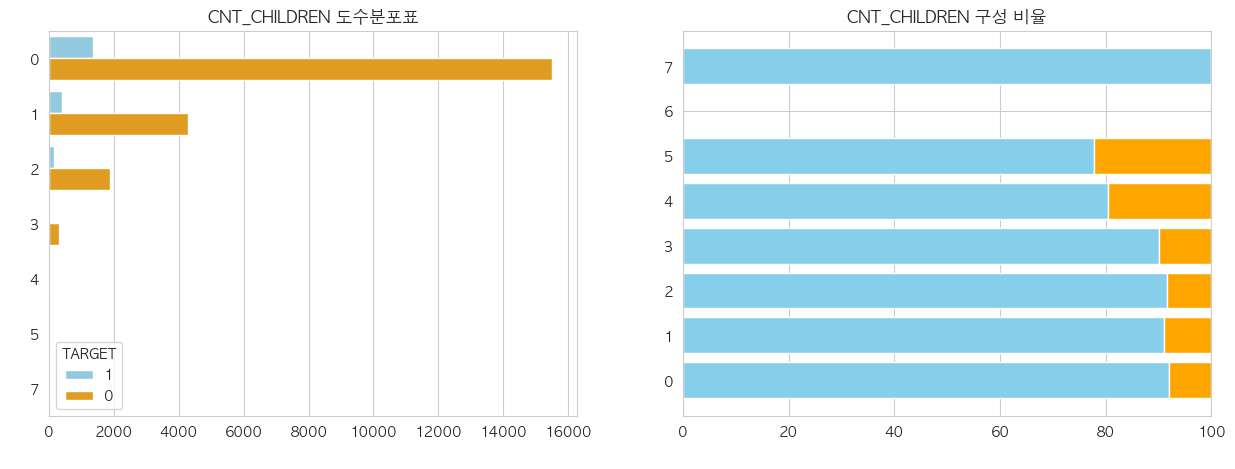

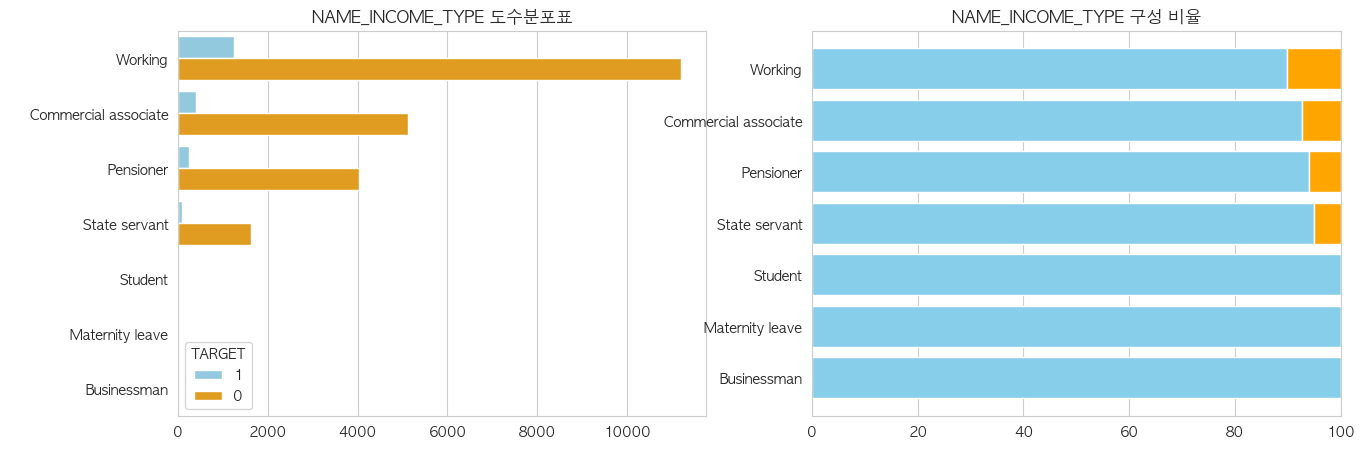

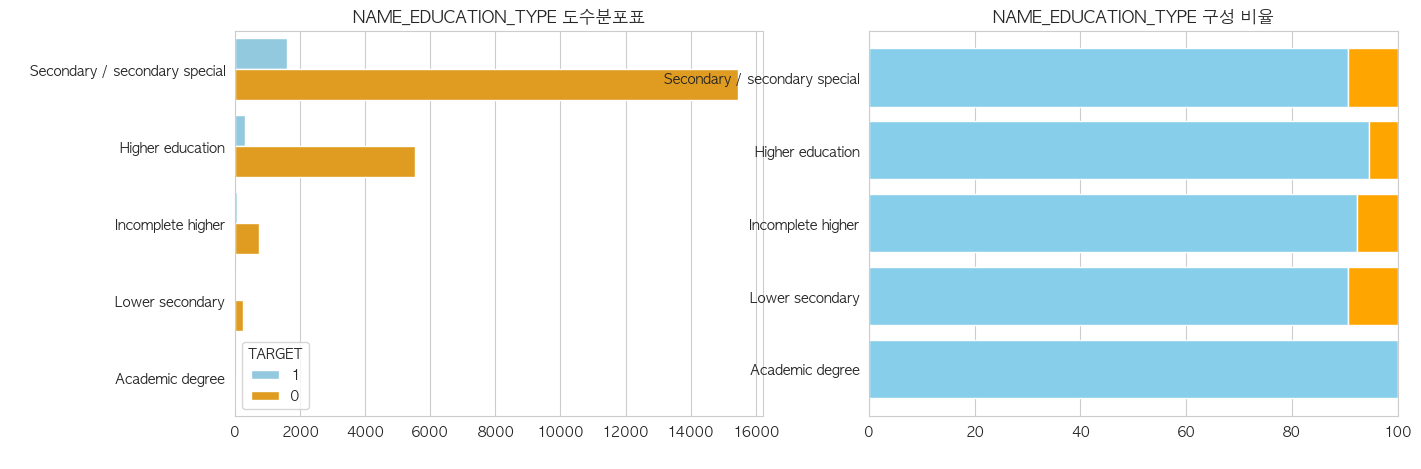

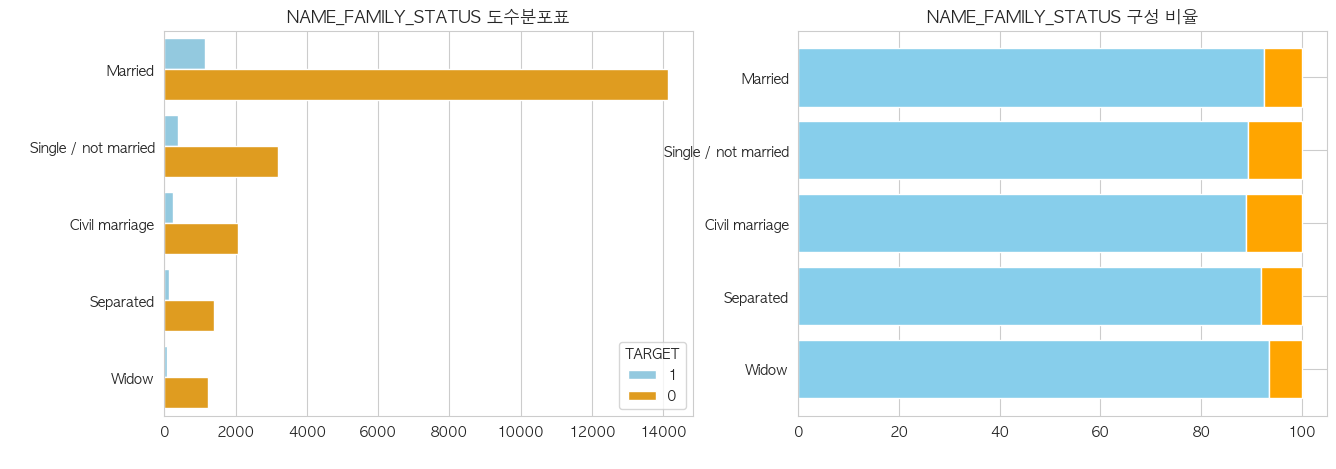

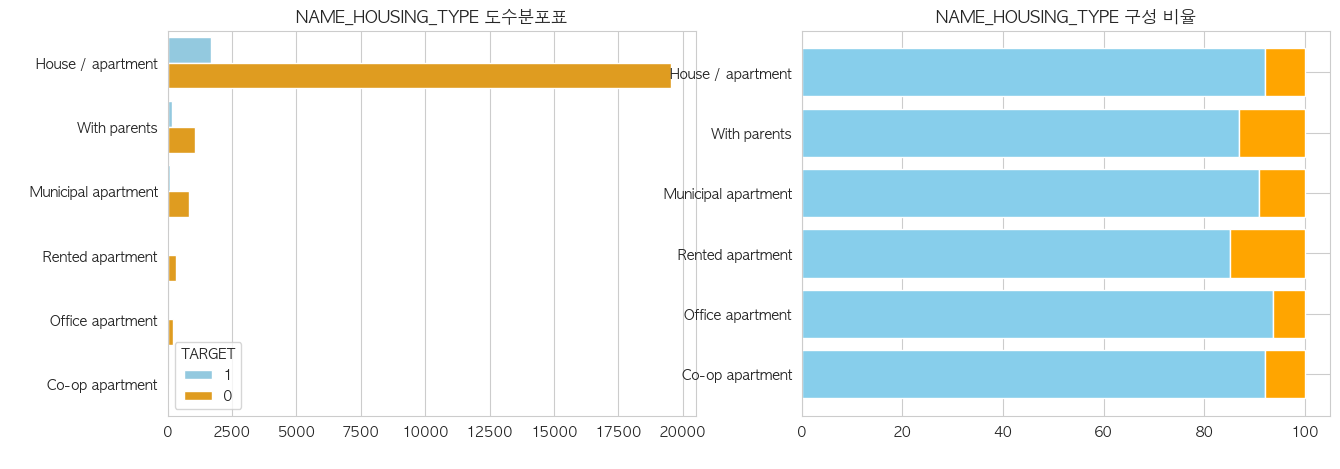

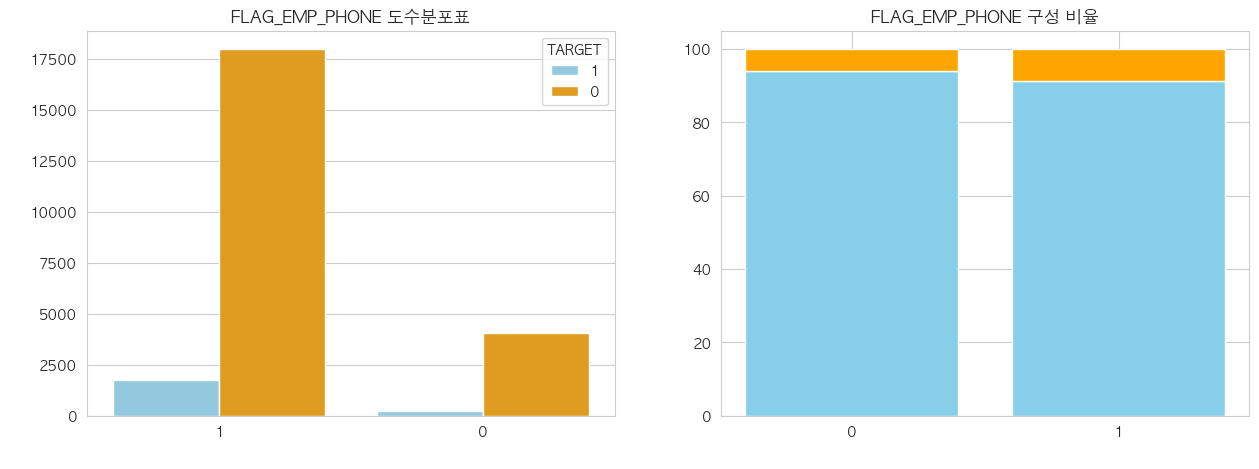

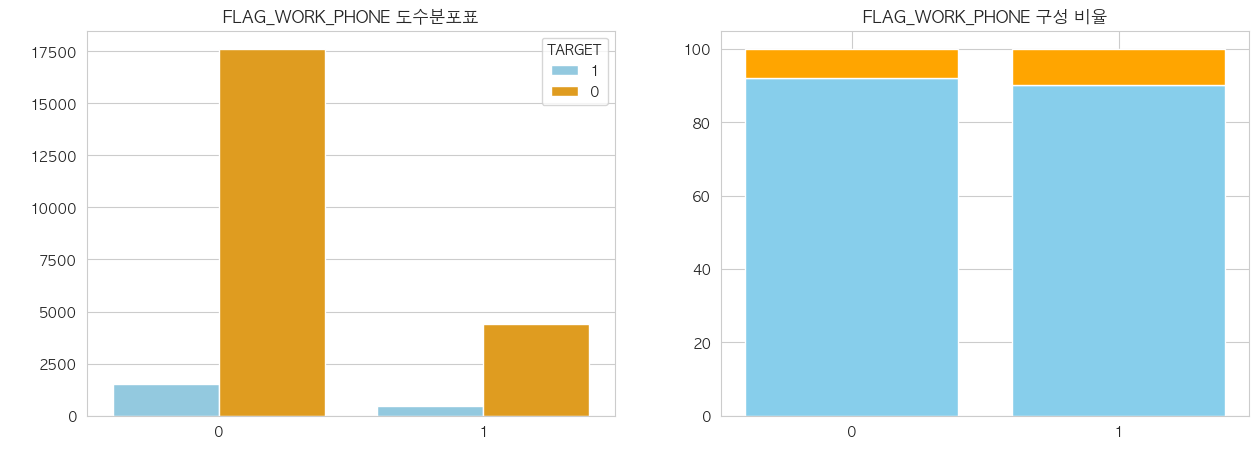

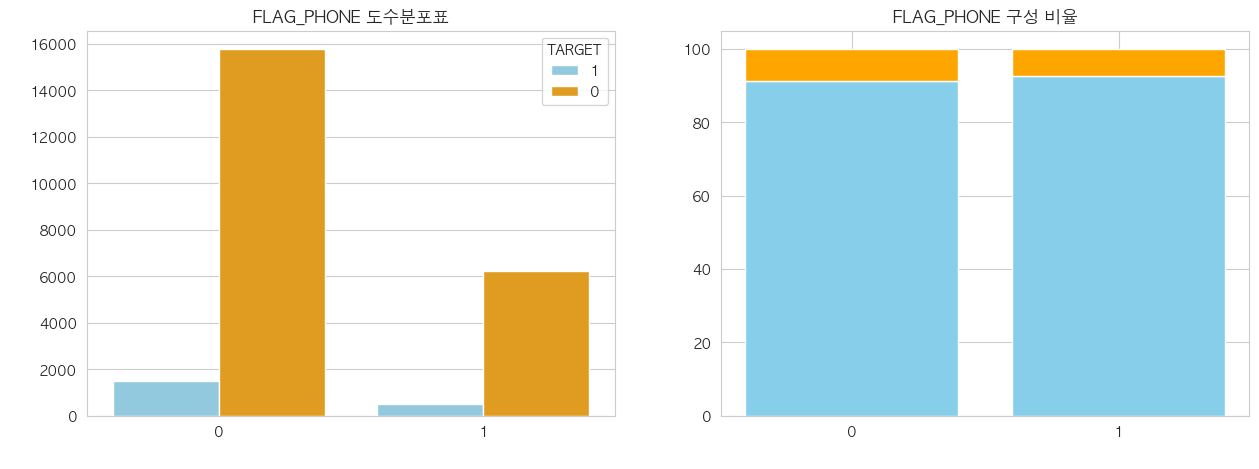

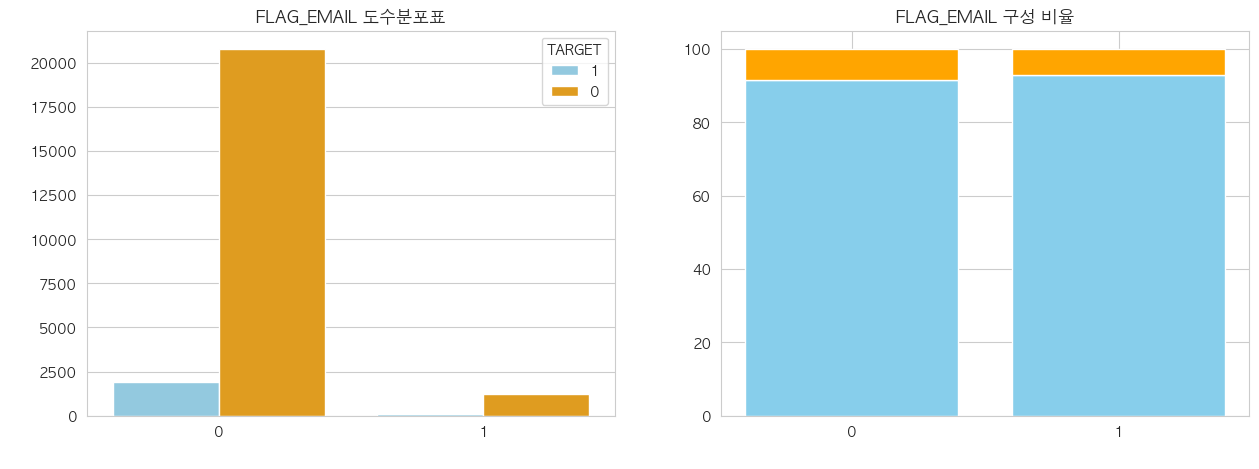

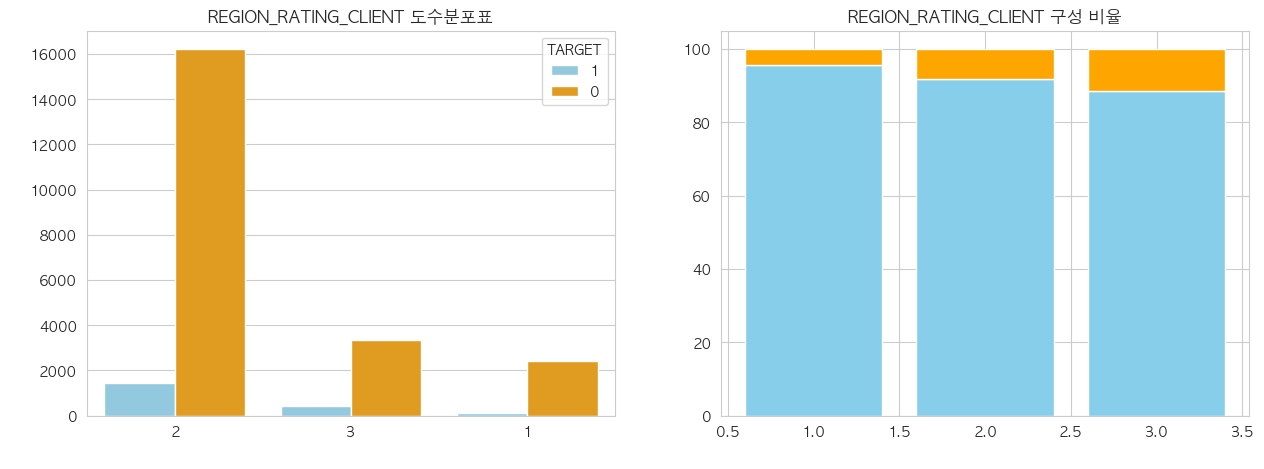

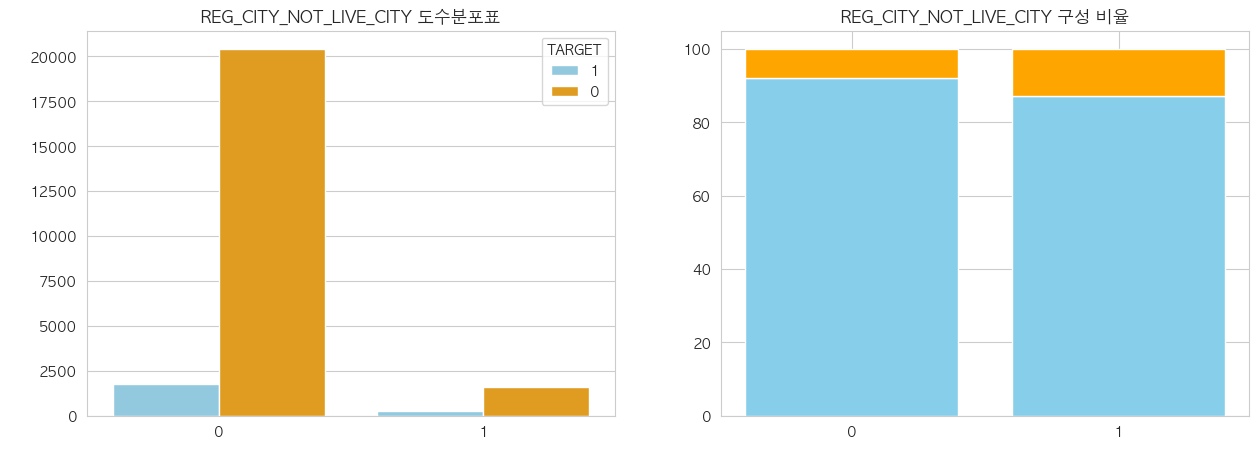

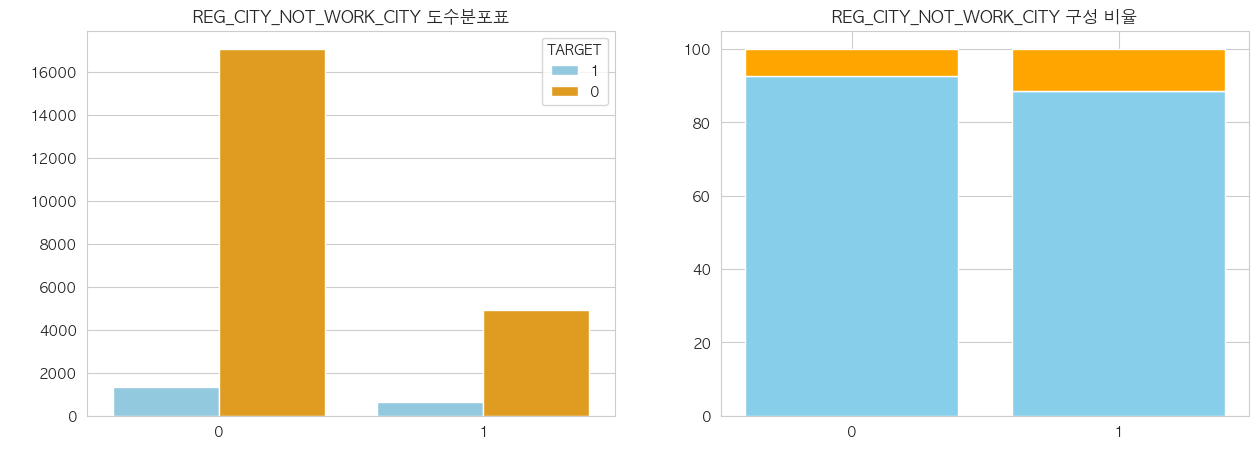

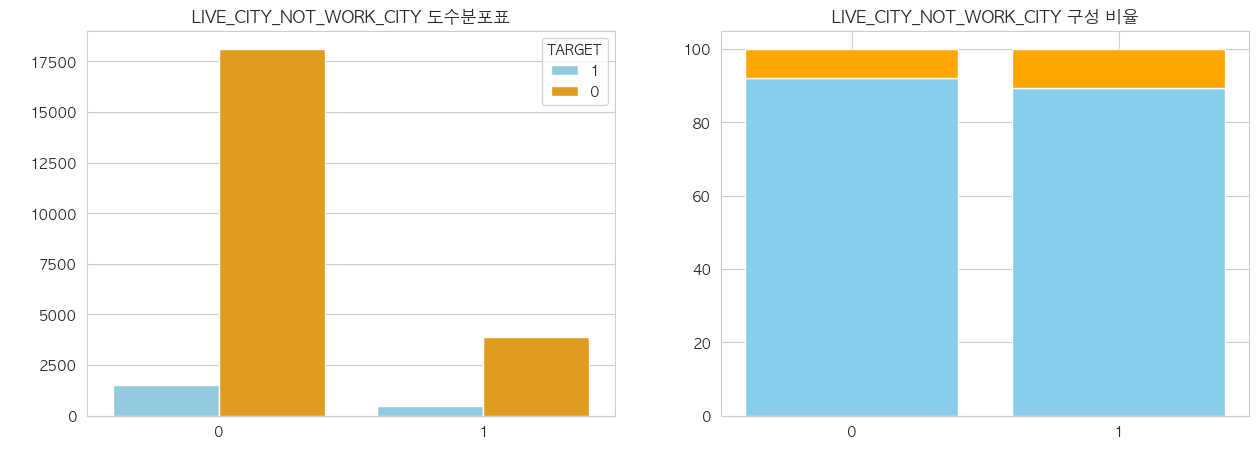

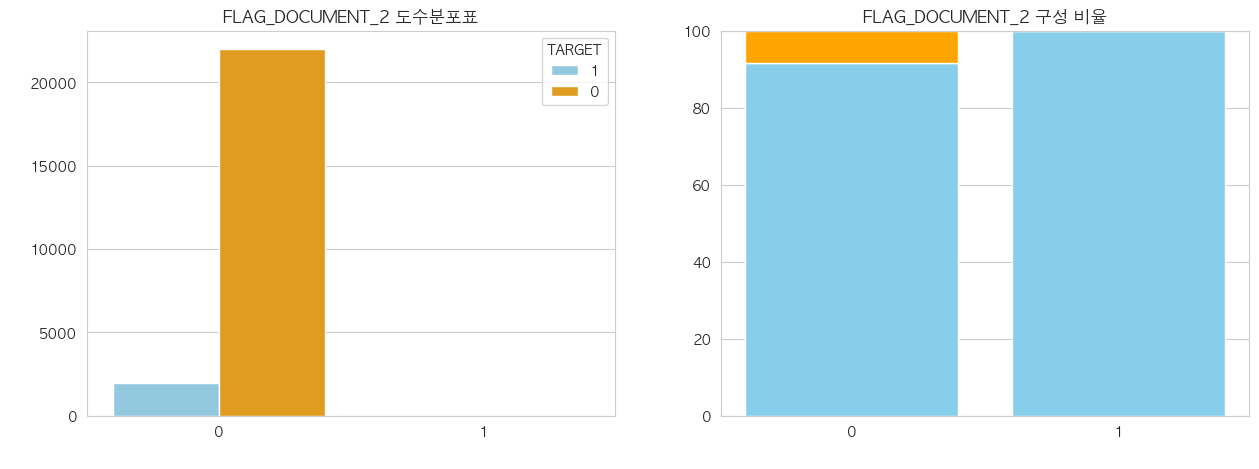

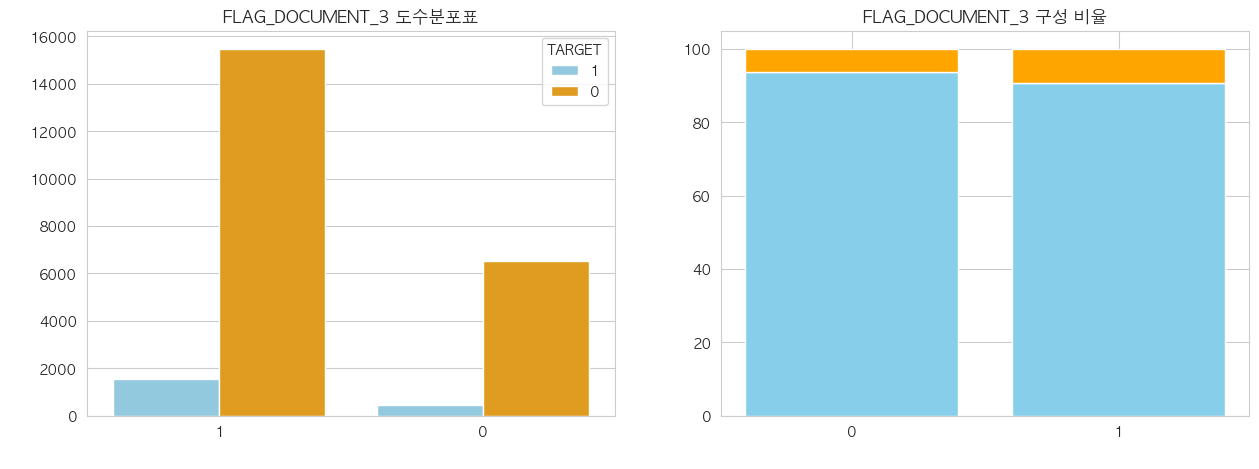

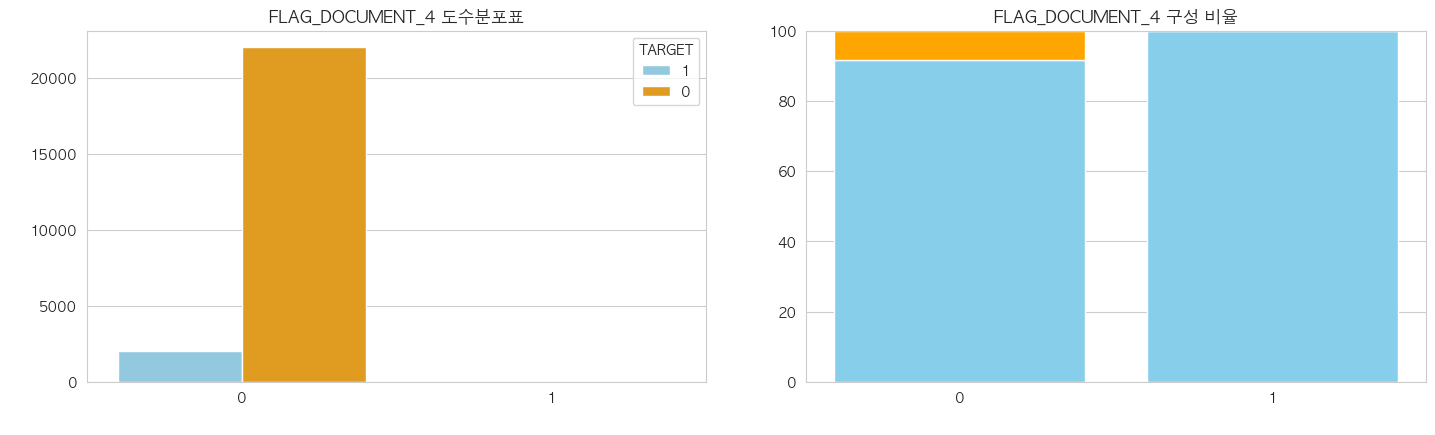

In [147]:
plot_stats_v(data1, normal_categorical_features)

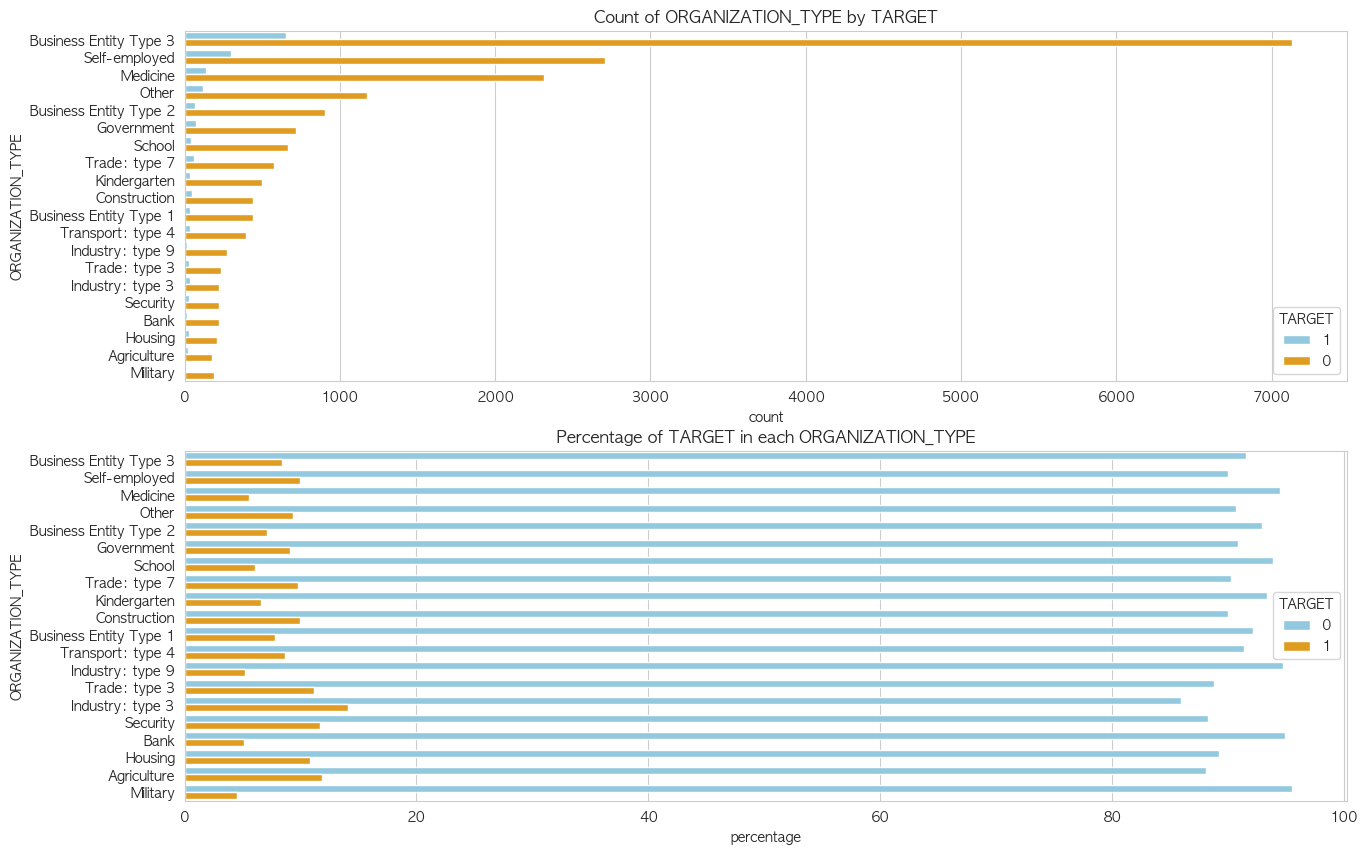

In [156]:
plot_top_categories(data1,'ORGANIZATION_TYPE')

결측치 대체 후 이상치 제거: 만약 결측값이 매우 많고, 그들을 대체하기 위한 충분한 정보(즉, 비결측 데이터)가 충분하지 않은 경우에는 먼저 결측값을 대체하는 것이 좋습니다. 그런 다음 전체 데이터 세트에서 이상값을 식별하고 처리할 수 있습니다.

In [117]:
def plot_histogram_boxplot(df, columns, group_option):
    sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일
    custom_palette = ["navy", "blue"]
    plt.rcParams['font.family'] = 'AppleGothic'  # for Mac

    for column in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        # 히스토그램 그리기
        if group_option == True : 
            sns.histplot(data=df, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
        else : 
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], palette=custom_palette)
    
        axes[0].set_title(f'{column}({column_info[column]})의 데이터 분포')
        axes[0].set_xlabel(' ')
        axes[0].set_ylabel('빈도')

        # 상자 그림 그리기
        if group_option == True : 
            sns.boxplot(data=df, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
        else : 
            sns.boxplot(data=df, y=column, ax=axes[1], palette=custom_palette)    
        
        axes[1].set_title(f'연체그룹별 {column}({column_info[column]})의 상자 그림')
        axes[1].set_xlabel(' ')
        axes[1].set_ylabel(' ')

        plt.tight_layout()
        plt.show()

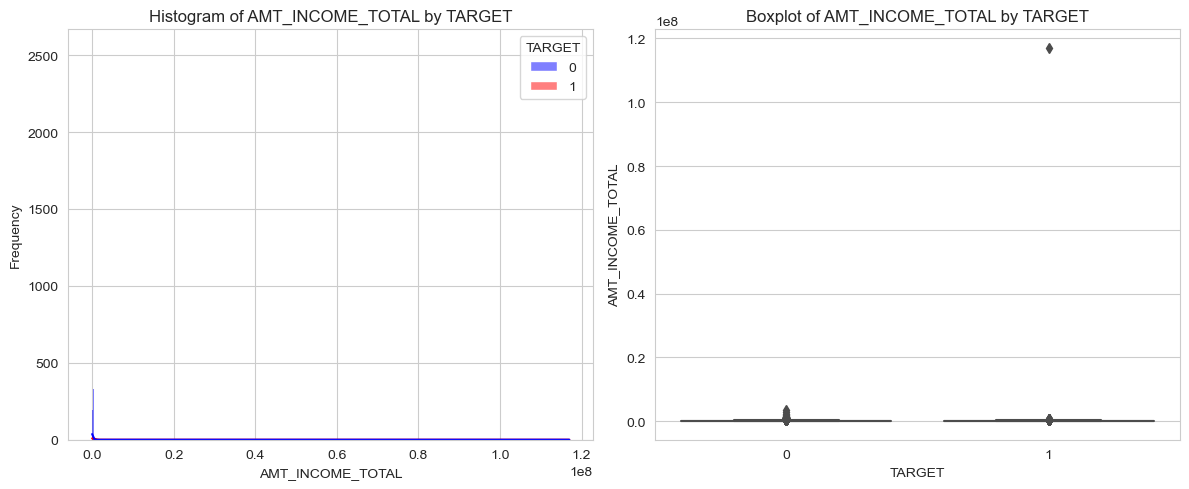

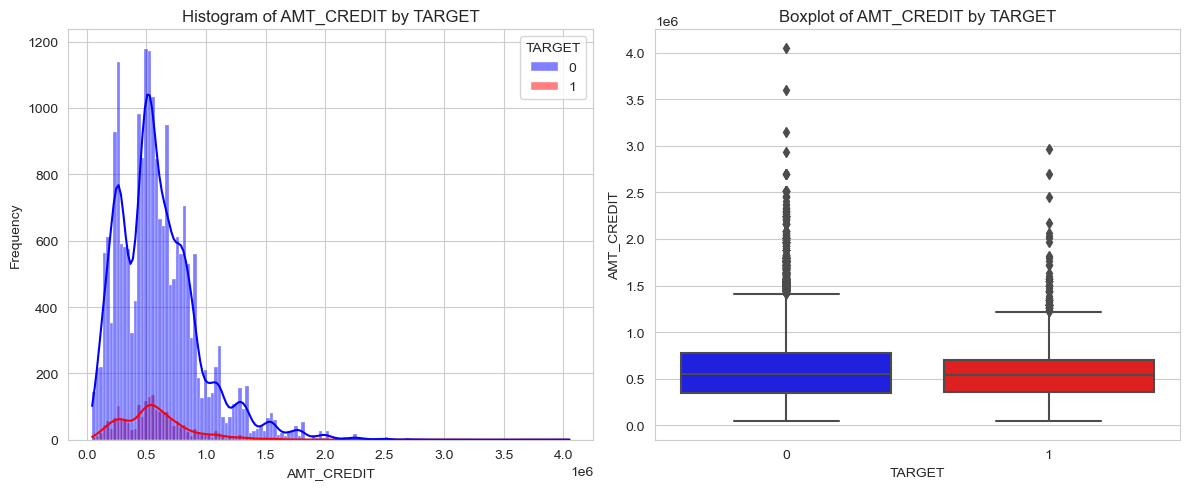

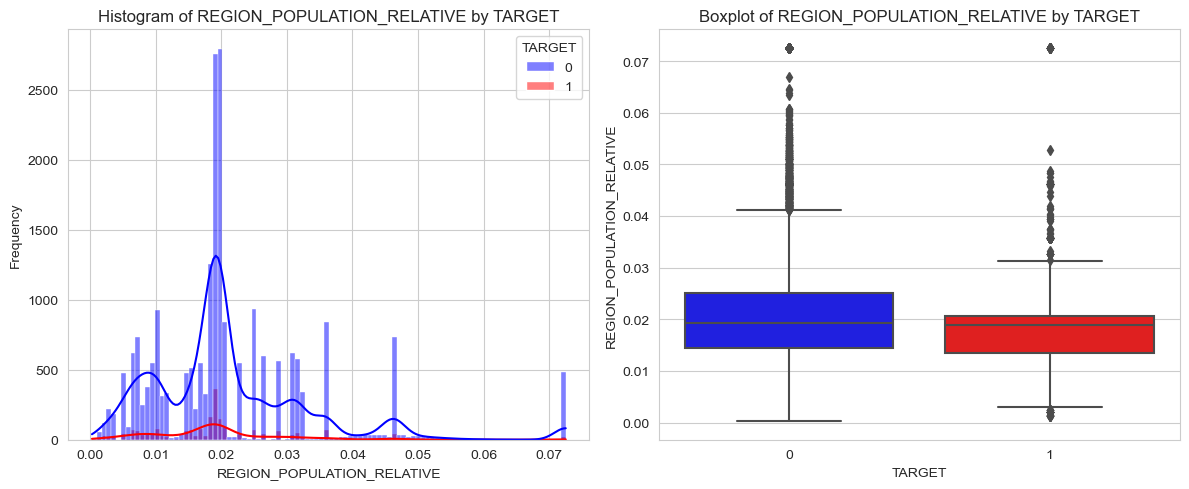

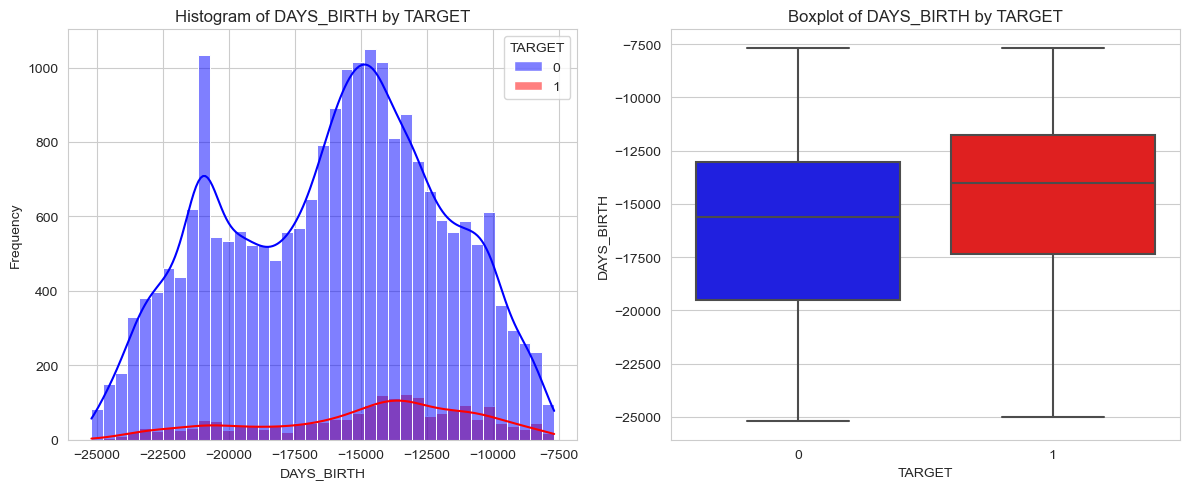

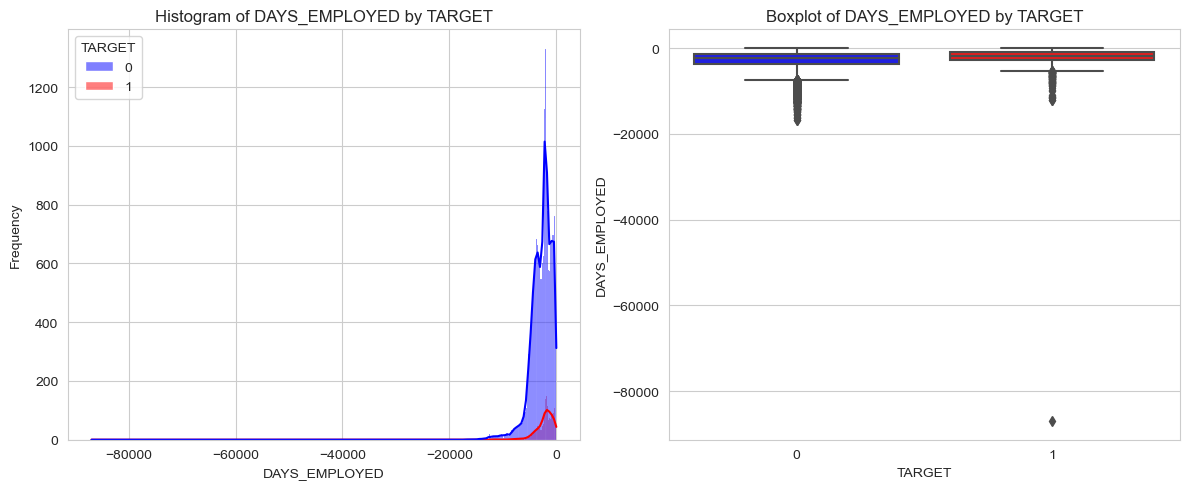

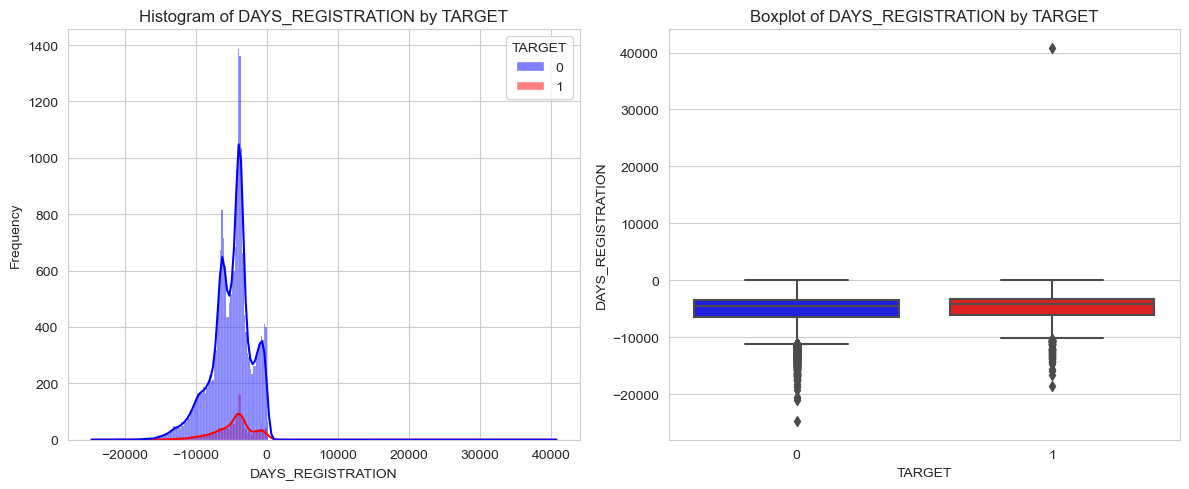

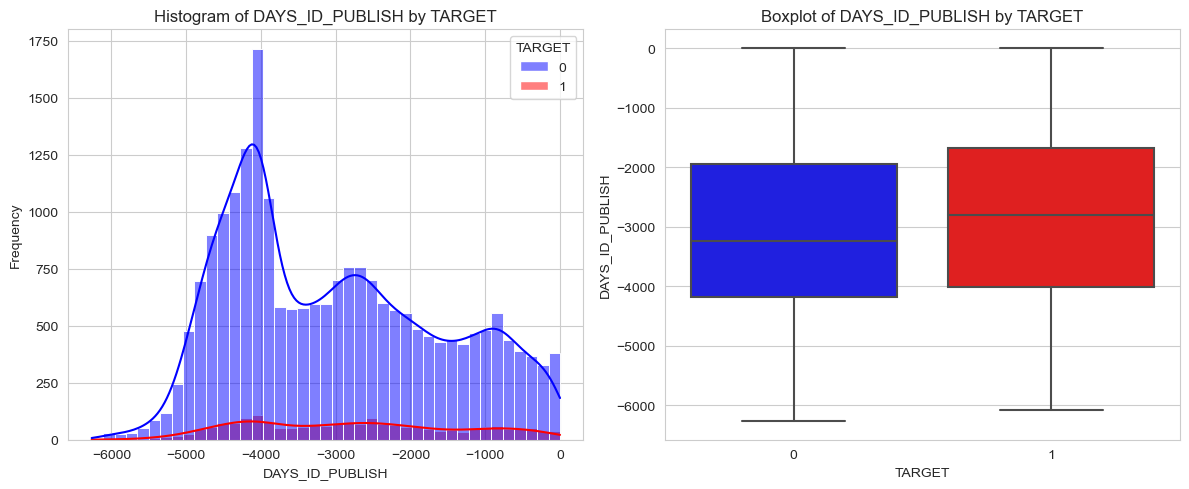

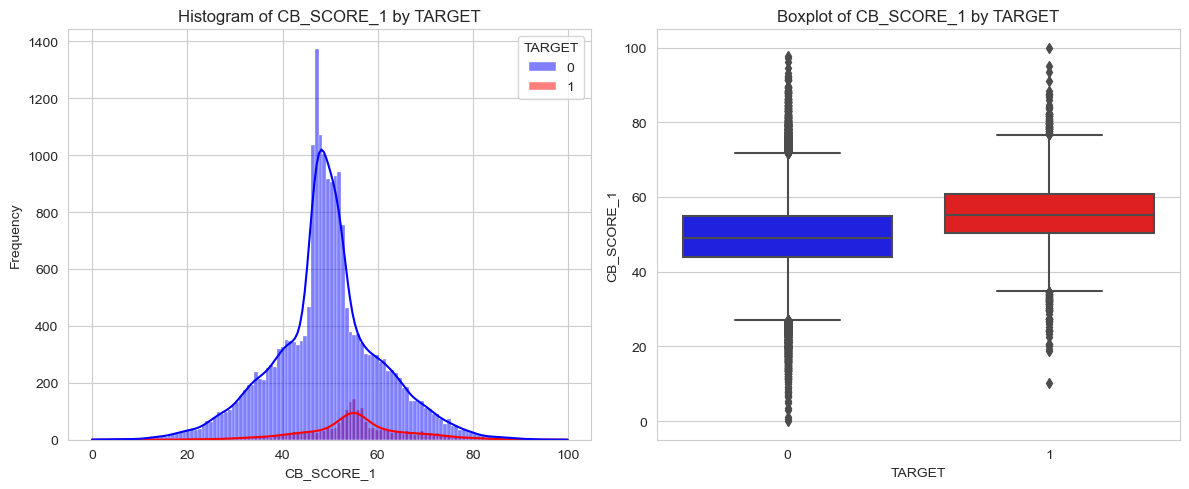

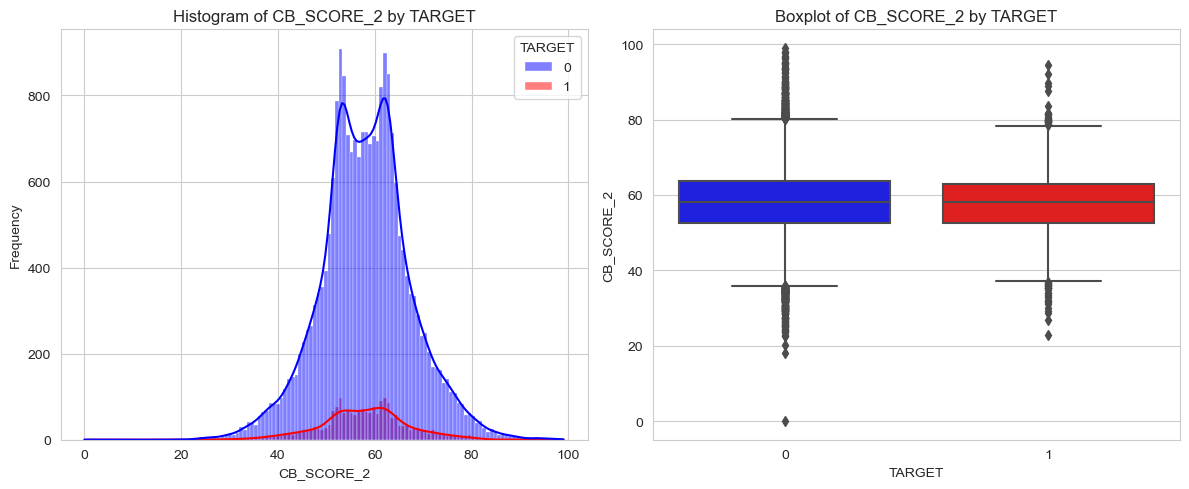

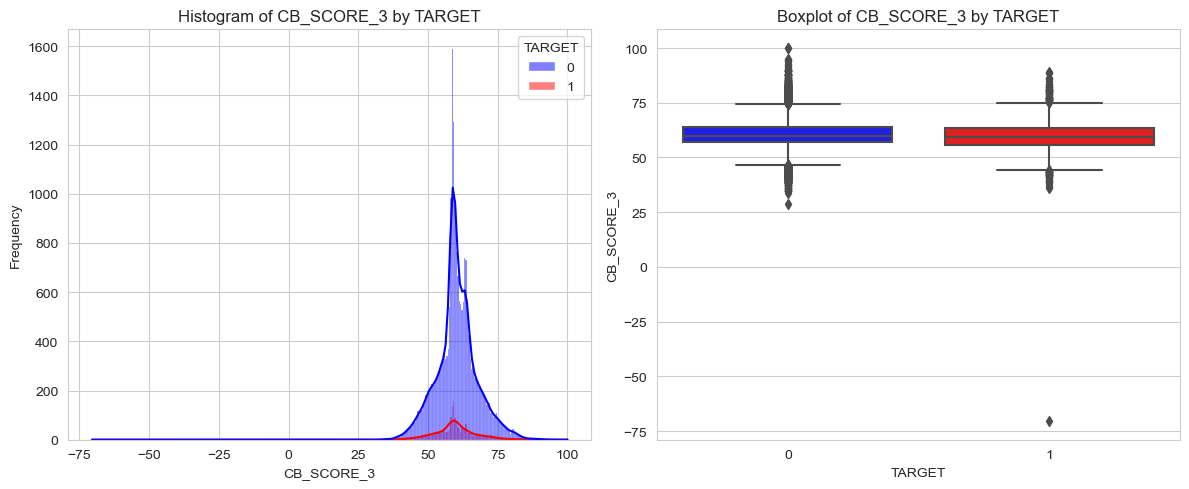

In [130]:
plot_histogram_boxplot(data1, numerical_features)  # 함수 호출
#plot_histogram_boxplot(data1, numerical_features, group_option = False)

이싱치 제거가 필요한 컬럼들
> 그 이유는?

이상치 제거 하는 함수 진행

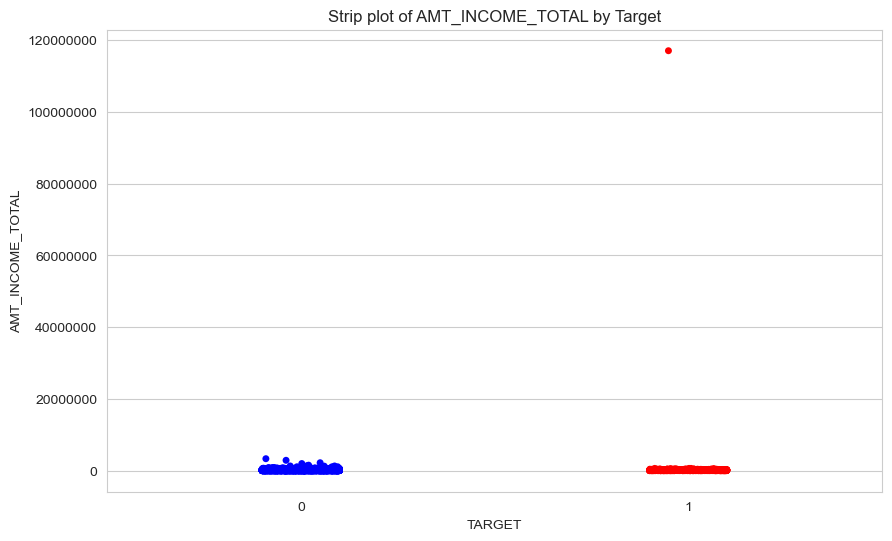

In [105]:
color = {'0':'blue', '1':'red'}
plot_stripplot(data1,'AMT_INCOME_TOTAL','TARGET',color)

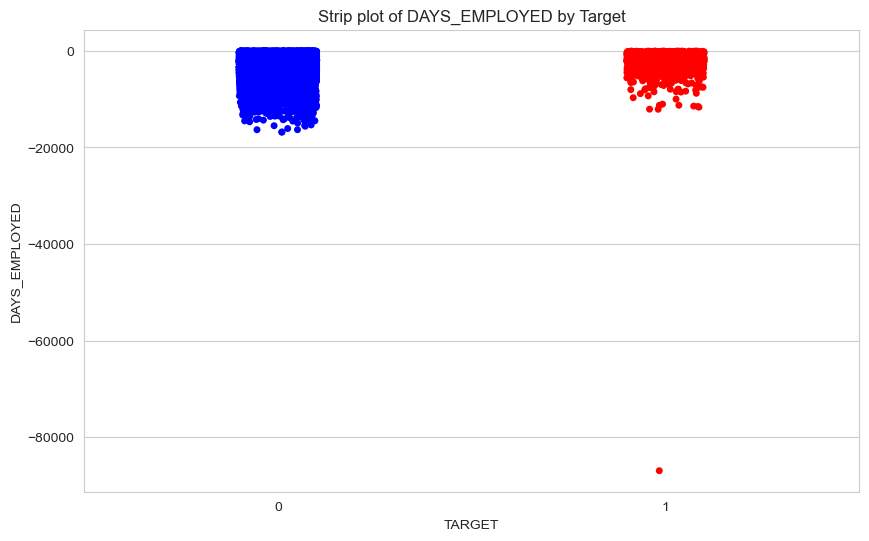

In [106]:
color = {'0':'blue', '1':'red'}
plot_stripplot(data1,'DAYS_EMPLOYED','TARGET',color)

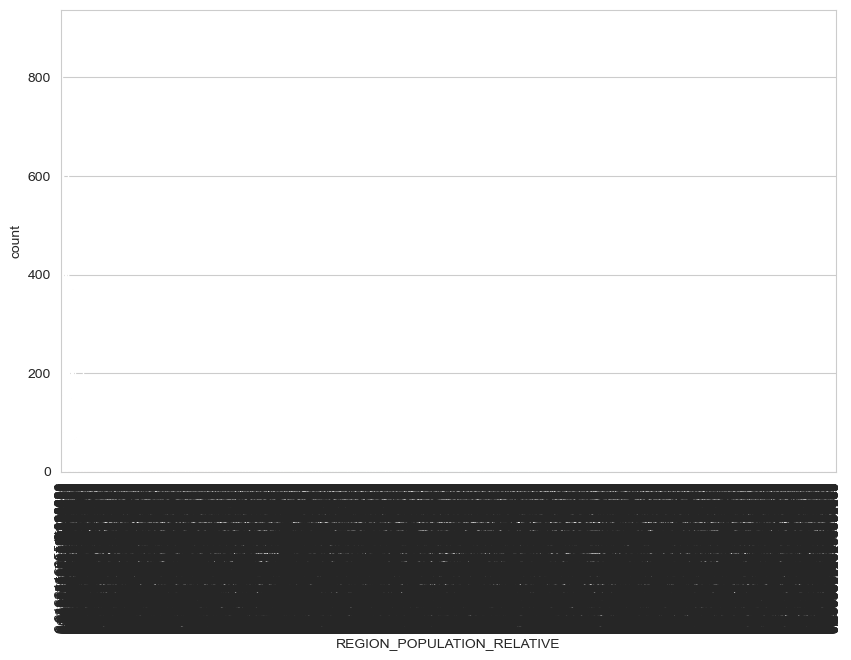

In [365]:
# 'region_population_relative' 컬럼을 문자열 타입으로 변환합니다.
data1['REGION_POPULATION_RELATIVE'] = data1['REGION_POPULATION_RELATIVE'].astype(str)

plt.figure(figsize=(10,6))
sns.countplot(data=data1, x='REGION_POPULATION_RELATIVE')
plt.xticks(rotation=90)  # X축 레이블 회전 (필요한 경우)
plt.show()

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_heatmaps(df, day_feature, hour_feature, target='TARGET'):
    df['TARGET'] = df['TARGET'].astype(int)  # 문자열을 정수형으로 변환
    # Create a pivot table for the counts heatmap
    pivot_counts = df.pivot_table(index=day_feature,
                                  columns=hour_feature,
                                  values=target,
                                  aggfunc='count')

    # Create a pivot table for the TARGET=1 ratio heatmap
    pivot_ratio = df[df[target] == 1].pivot_table(index=day_feature,
                                                  columns=hour_feature,
                                                  values=target,
                                                  aggfunc='count')

    # Reorder index (days of week) from Monday to Sunday
    days_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    
    pivot_counts = pivot_counts.reindex(days_order)
    pivot_ratio = pivot_ratio.reindex(days_order)

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

    # Plot counts heatmap
    sns.heatmap(pivot_counts.fillna(0),
                ax=axes[0],
                cmap="Blues",
                annot=True,
                fmt=".0f")  # Use no decimal places
    
    axes[0].set_title('Counts Heatmap')

     # Plot TARGET=1 ratio heatmap
    sns.heatmap(pivot_ratio.fillna(0),
               ax=axes[1],
               cmap="Blues",
               annot=True,
               fmt=".2f")  # Use two decimal places

    axes[1].set_title('TARGET 1 Ratio Heatmap')
    
    # Calculate the mean of y values for each day and hour
    plotdf = df.groupby([day_feature, hour_feature])[target].mean().unstack()*100

    sns.heatmap(plotdf, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, ax=axes[2])

    # Set axis labels
    axes[2].set_xlabel('Hour')
    axes[2].set_ylabel('Day of Week')

    # Show the plot
    plt.show()


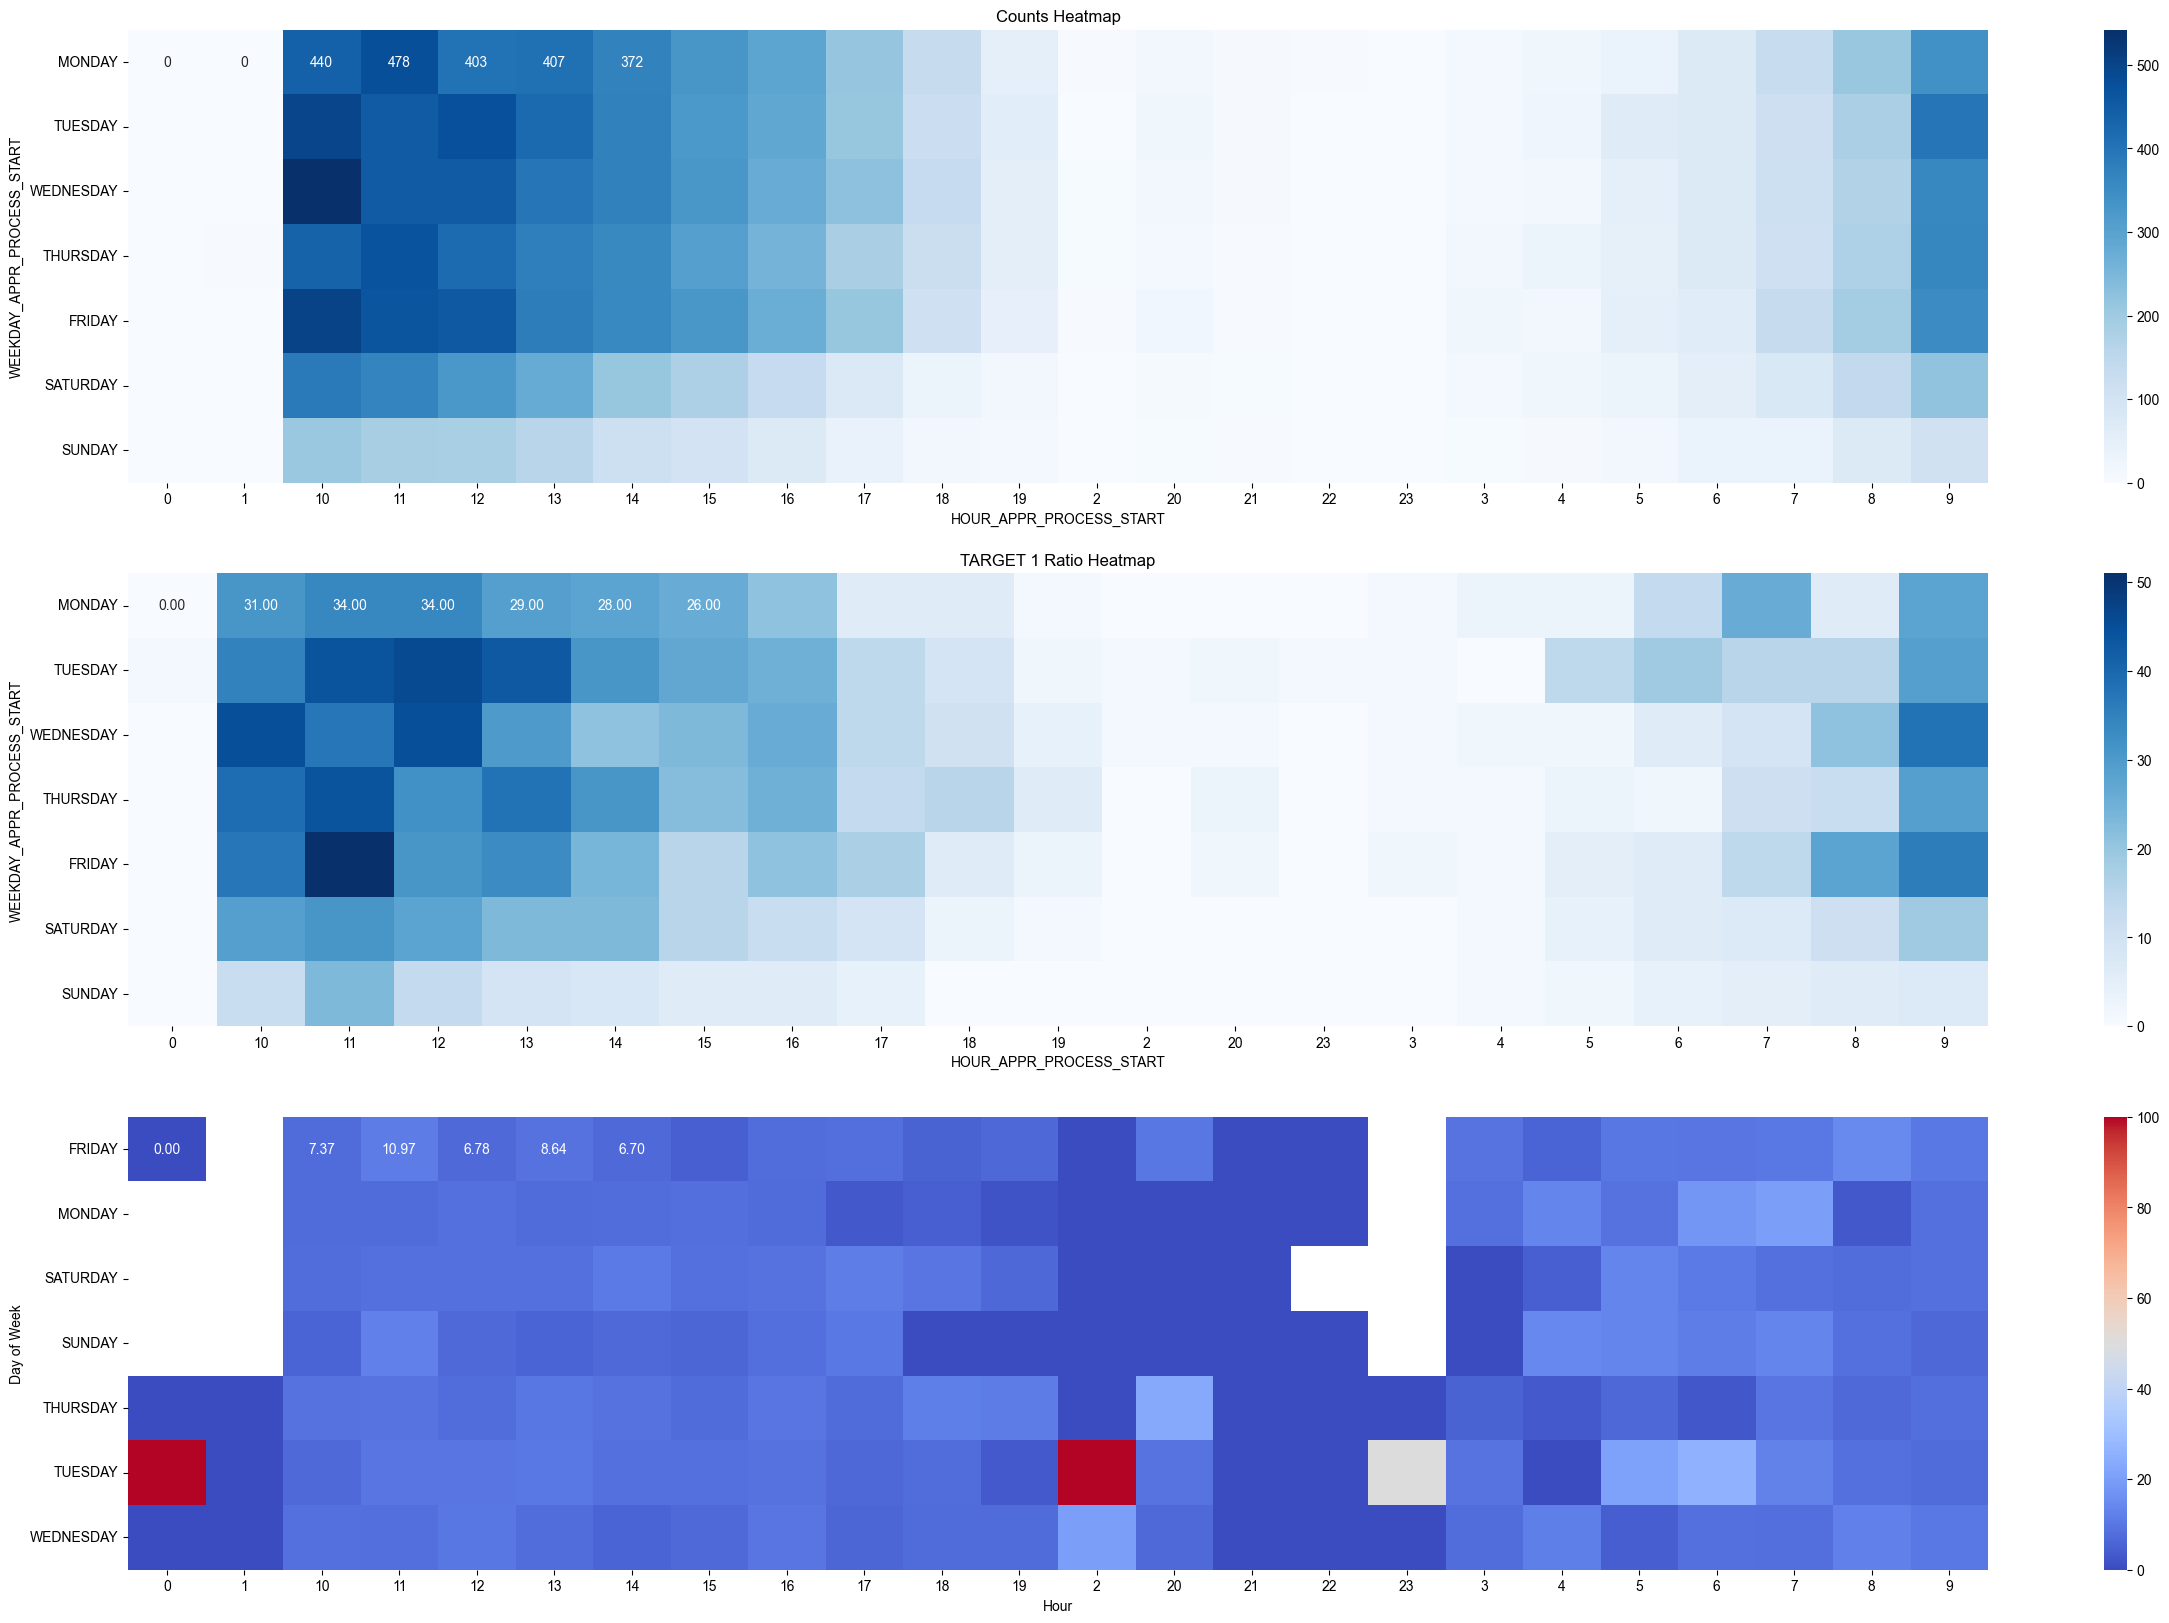

In [62]:
plot_heatmaps(data1,'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START')

상관계수 파악한 다음 파생변수만드려고함

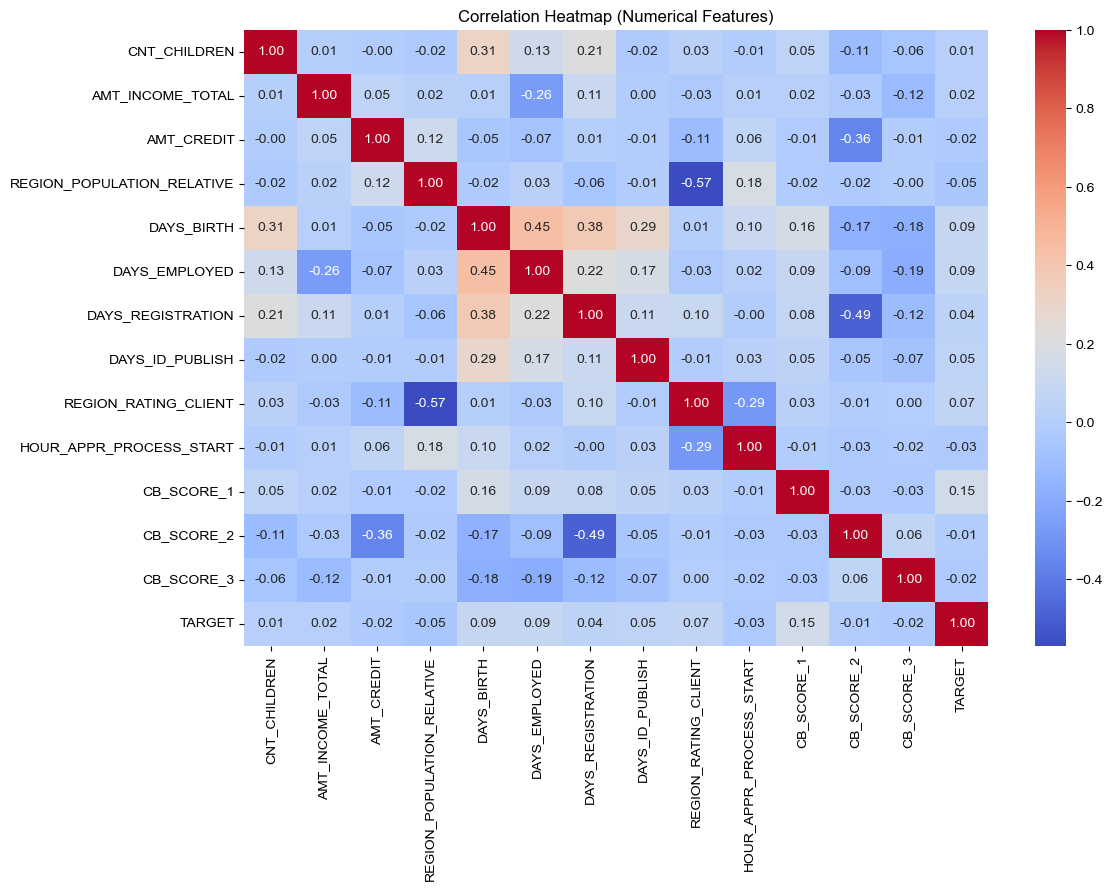

In [84]:
def plot_correlation_matrix(dataset):

    # 수치형 변수 간의 상관 행렬 계산
    correlation_matrix = dataset.corr()

    # 상관 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()


# 예시 데이터셋을 넣어 함수 호출
plot_correlation_matrix(data1.select_dtypes(include=[np.number]))

In [112]:
corr_matrix = data1.corr()
corr_with_target = corr_matrix["TARGET"].sort_values(ascending=False)
print(corr_with_target)

TARGET                        1.000000
CB_SCORE_1                    0.146214
DAYS_BIRTH                    0.088513
DAYS_EMPLOYED                 0.085218
REGION_RATING_CLIENT          0.065444
DAYS_ID_PUBLISH               0.051046
DAYS_REGISTRATION             0.037255
AMT_INCOME_TOTAL              0.017482
CNT_CHILDREN                  0.014485
CB_SCORE_2                   -0.008186
AMT_CREDIT                   -0.020514
CB_SCORE_3                   -0.023515
HOUR_APPR_PROCESS_START      -0.028058
REGION_POPULATION_RELATIVE   -0.047900
Name: TARGET, dtype: float64


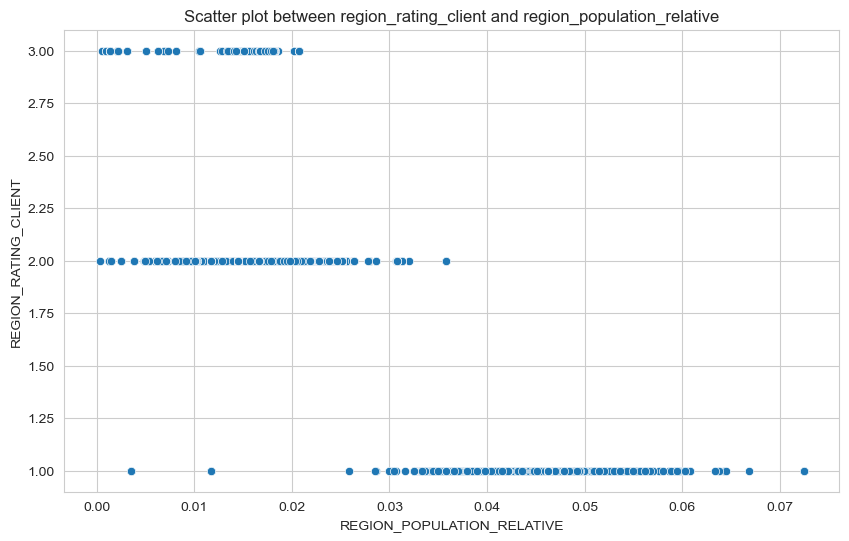

In [162]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x="REGION_POPULATION_RELATIVE", y="REGION_RATING_CLIENT")
plt.title("Scatter plot between region_rating_client and region_population_relative")
plt.show()

## 연체 여부에 따른 상관관계가 높은 수치형 변수는 없음

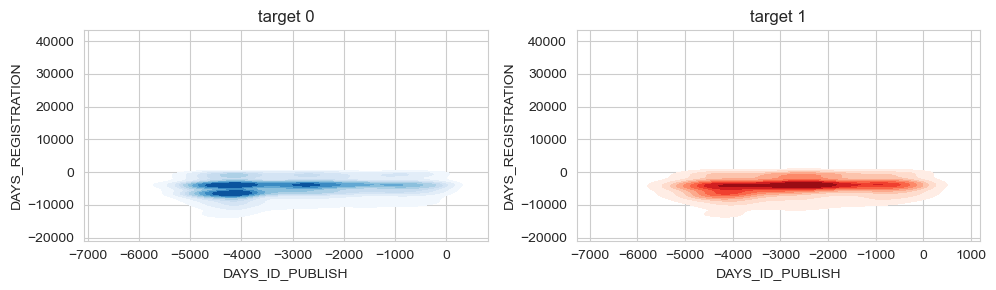

In [88]:
paid = data1[data1.TARGET == 0]
unpaid = data1[data1.TARGET == 1]

f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(data=paid, x='DAYS_ID_PUBLISH', y='DAYS_REGISTRATION', cmap="Blues", shade=True, shade_lowest=False, ax=axes[0]).set_title('target 0')
sns.kdeplot(data=unpaid, x='DAYS_ID_PUBLISH', y='DAYS_REGISTRATION', cmap="Reds", shade=True, shade_lowest=False, ax=axes[1]).set_title('target 1')
sns.set_style('whitegrid')

# Y축 범위를 동일하게 맞추기
axes[0].set_ylim(axes[1].get_ylim())

plt.tight_layout()


In [107]:
# 연령 파생변수 생성
data['AGE'] = (-data['DAYS_BIRTH'] // 365)
# 연차 파생변수 생성
data['YEARS_EMPLOYED'] = (-data['DAYS_EMPLOYED'] // 365)

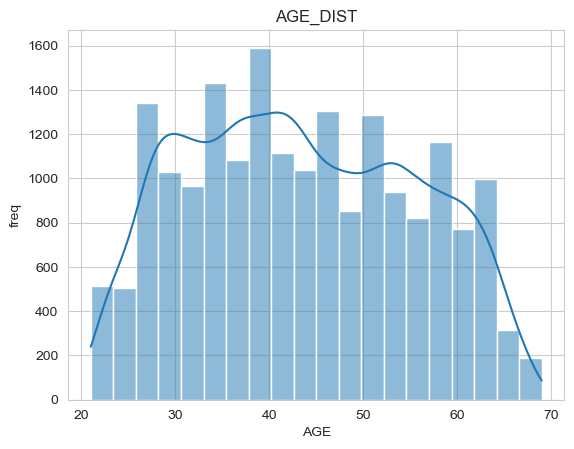

In [108]:
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('AGE_DIST')
plt.xlabel('AGE')
plt.ylabel('freq')
plt.show()

<Axes: xlabel='Importance', ylabel='Feature'>

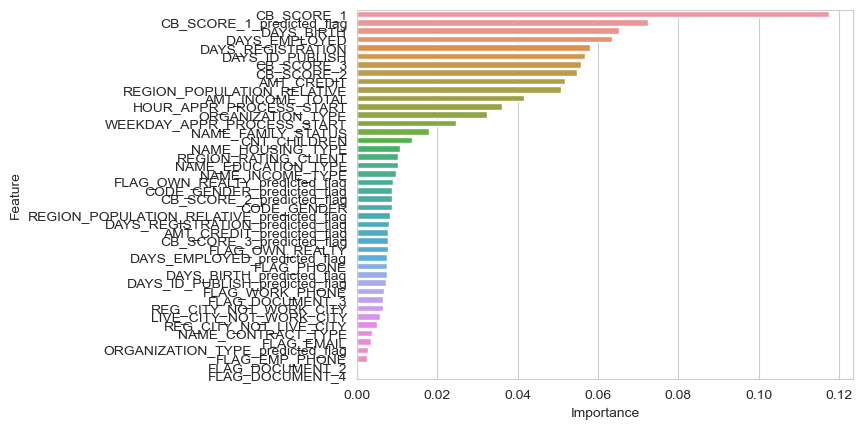

In [115]:

# 모든 문자열 컬럼을 찾아서 Label Encoding 적용
label_encoders = {}
for column in data1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    label_encoders[column] = le

# 이제 RandomForestClassifier에 fit 가능
rf = RandomForestClassifier()
rf.fit(data1.drop('TARGET', axis=1), data1['TARGET'])

feature_importances = pd.DataFrame({
    'Feature': data1.drop('TARGET', axis=1).columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)

In [116]:
feature_importances

,Feature,Importance
29,CB_SCORE_1,0.117628
40,CB_SCORE_1_predicted_flag,0.072560
11,DAYS_BIRTH,0.065194
12,DAYS_EMPLOYED,0.063394
13,DAYS_REGISTRATION,0.058105
14,DAYS_ID_PUBLISH,0.056661
31,CB_SCORE_3,0.055791
30,CB_SCORE_2,0.054658
5,AMT_CREDIT,0.051894
10,REGION_POPULATION_RELATIVE,0.050798


In [ ]:
##파생변수

## 3. Feature Engineering  <a id="s-3">

#### 앞서 진행한 데이터 분포 및 데이터셋에 대한 전반적인 배경지식, 변수 중요도를 기반으로 파생변수를 생성

In [119]:
data2 = data1.copy()

### 3-1. 파생변수 생성  <a id="s-3.1">

- #### 연령

In [124]:
data2['AGE'] = round(data2['DAYS_BIRTH'] / 365)*-1
data2['AGE'].head(5)

0    26.0
1    52.0
2    35.0
3    31.0
4    42.0
Name: AGE, dtype: float64

- #### 근무 연차

In [146]:
data2['YEARS_EMPLOYED'] = round(data2['DAYS_EMPLOYED'] / 365)*-1
data2['YEARS_EMPLOYED'].head(5)

0     2.0
1    10.0
2     6.0
3     2.0
4     1.0
Name: YEARS_EMPLOYED, dtype: float64

- #### 최신정보등록기간(월단위)

In [150]:
data2['DAYS_REGISTRATION_MONTH'] = round(data2['DAYS_REGISTRATION'] / 30)*-1
#data2['DAYS_REGISTRATION_MONTH'].head(5)
data2['DAYS_REGISTRATION_MONTH'].max()

822.0

- #### 근무기간(월단위)

In [151]:
data2['MONTH_EMPLOYED'] = round(data2['DAYS_EMPLOYED'] / 30)*-1
data2['MONTH_EMPLOYED'].head(5)

0     21.0
1    126.0
2     68.0
3     25.0
4     16.0
Name: MONTH_EMPLOYED, dtype: float64

- #### 신분증변경시점차이(월단위)

In [152]:
data2['DAYS_ID_PUBLISH_YEARS'] = round(data2['DAYS_ID_PUBLISH'] / 30)*-1
data2['DAYS_ID_PUBLISH_YEARS'].head(5)

0     71.0
1     84.0
2    129.0
3     89.0
4     17.0
Name: DAYS_ID_PUBLISH_YEARS, dtype: float64

- #### 소득금액대비신용대출금액

In [157]:
# 국내 DSR과 유사한 개념

data2['ANNUITY_INCOME_PERCENT'] = (data2['AMT_CREDIT'] / data2['AMT_INCOME_TOTAL'])
data2['ANNUITY_INCOME_PERCENT'].head(5)

0    2.863394
1    2.000000
2    4.718542
3    4.360842
4    2.983467
Name: ANNUITY_INCOME_PERCENT, dtype: float64

- #### 평균신용점수

In [159]:
data2['AVG_CB_SCORE'] = (data2['CB_SCORE_1'] + data2['CB_SCORE_2'] + data2['CB_SCORE_3'])/3
data2['AVG_CB_SCORE'].head(5)

0    56.854811
1    43.511234
2    57.265988
3    65.688910
4    60.655339
Name: AVG_CB_SCORE, dtype: float64

- #### 정보등록유무

In [163]:
data2['CUST_REG_INFO_FLAG'] = data2['FLAG_EMP_PHONE'] | data2['FLAG_WORK_PHONE'] | data2['FLAG_PHONE'] | data2['FLAG_EMAIL']
data2['CUST_REG_INFO_FLAG'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: CUST_REG_INFO_FLAG, dtype: int64

- #### 한부모가족형태여부

In [172]:
# 'IS_SINGLE_PARENT' 컬럼을 생성하고 모든 값을 'N'으로 초기화
data2['IS_SINGLE_PARENT'] = 'N'

# 지정된 조건에 따라 값들을 'Y'로 업데이트
data2.loc[((data2['NAME_FAMILY_STATUS'] == 'Single / not married') | 
           (data2['NAME_FAMILY_STATUS'] == 'Widow')) & 
          (data2['CNT_CHILDREN'] > 0), 'IS_SINGLE_PARENT'] = 'Y'
data2['IS_SINGLE_PARENT'].head(5)

0    N
1    N
2    N
3    N
4    N
Name: IS_SINGLE_PARENT, dtype: object

- #### 신용점수최소값

In [174]:
data2['MIN_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].min(axis=1)
data2['MIN_CB_SCORE'].head(5)

0    55.480659
1    26.499494
2    49.161400
3    45.996152
4    56.678852
Name: MIN_CB_SCORE, dtype: float64

- #### 신용점수중앙값

In [175]:
data2['MEDIAN_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].median(axis=1)
data2['MEDIAN_CB_SCORE'].head(5)

0    56.734550
1    46.433666
2    59.140194
3    68.694333
4    59.087181
Name: MEDIAN_CB_SCORE, dtype: float64

- #### 신용점수표준편차

In [177]:
data2['STD_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
data2['STD_CB_SCORE'].head(5)

0     1.438059
1    15.755134
2     7.348968
3    18.375316
4     4.950488
Name: STD_CB_SCORE, dtype: float64

- #### 신용점수최대값

In [179]:
data2['MAX_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].max(axis=1)
data2['MAX_CB_SCORE'].head(5)

0    58.349224
1    57.600542
2    63.496369
3    82.376245
4    66.199985
Name: MAX_CB_SCORE, dtype: float64

- #### 주말취급고객유무

In [180]:
data2['WEEKEND_APPR_PROCESS_START'] = 'N'
data2.loc[(data2['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY') | 
                     (data2['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY'), 'WEEKEND_APPR_PROCESS_START'] = 'Y'
data2['WEEKEND_APPR_PROCESS_START'].head(5)

0    N
1    N
2    N
3    N
4    N
Name: WEEKEND_APPR_PROCESS_START, dtype: object

- #### 자녀수대비소득

In [181]:
# 아이수 대비 소득

data2['CHILDREN_INCOME_PERCENT'] = (data2['AMT_INCOME_TOTAL'] / (data2['CNT_CHILDREN']+1)) * 10
data2['CHILDREN_INCOME_PERCENT'].head(5)

0    2025000.0
1     675000.0
2    1080000.0
3     450000.0
4    2025000.0
Name: CHILDREN_INCOME_PERCENT, dtype: float64

- #### 근무기간대비나이

In [183]:
# 일한 기간 대비 나이

data2['DAYS_EMPLOYED_PERCENT'] = (data2['DAYS_EMPLOYED'] / data2['DAYS_BIRTH']) * 100
data2['DAYS_EMPLOYED_PERCENT'].head(5)

0     6.732903
1    19.885442
2    15.791392
3     6.609959
4     3.073926
Name: DAYS_EMPLOYED_PERCENT, dtype: float64

In [42]:
FILLED_DATA_ADJ = FILLED_DATA_ADJ.astype({'CUST_REG_INFO_FLAG': object, 'WEEKEND_APPR_PROCESS_START' : object, })

- #### 근무기간및출생기간_상호작용변수

In [184]:
# 상호 작용 변수: 상관계수 0.45
data2['DAYS_BIRTH_x_DAYS_EMPLOYED'] = data2['DAYS_BIRTH'] * data2['DAYS_EMPLOYED']
data2['DAYS_BIRTH_x_DAYS_EMPLOYED'].head(5)

0    6.026657e+06
1    7.213447e+07
2    2.640491e+07
3    8.419356e+06
4    7.339963e+06
Name: DAYS_BIRTH_x_DAYS_EMPLOYED, dtype: float64

- #### 출생기간제곱_다항변수

In [186]:
# 나이와 대출 연체 가능성 사이의 관계는 단순히 선형적이지 않음. 예를 들어, 중간 연령대의 사람들이 연체 가능성이 더 낮을 수 있으며, 이는 U자형 곡선을 형성
# 이러한 이유로, DAYS_BIRTH의 다항 특징을 고려하는 것은 이 비선형 관계를 파악하는 데 도움. 예를 들어, DAYS_BIRTH의 제곱을 고려함으로써 나이와 타겟 변수 사이의 U자형 관계를 잡아낼 수 있음.

data2['DAYS_BIRTH_SQUARE'] = data2['DAYS_BIRTH'] ** 2
data2['DAYS_BIRTH_SQUARE'].head(5)

0    8.951052e+07
1    3.627501e+08
2    1.672108e+08
3    1.273738e+08
4    2.387814e+08
Name: DAYS_BIRTH_SQUARE, dtype: float64

- #### 신용점수1의 결측예측여부 결합_변수중요도고려변수

In [187]:
data2['CB_SCORE_1_x_predicted_flag'] = data2['CB_SCORE_1'] * data2['CB_SCORE_1_predicted_flag']
data2['CB_SCORE_1_x_predicted_flag'].head(5)

0    55.480659
1     0.000000
2    49.161400
3     0.000000
4     0.000000
Name: CB_SCORE_1_x_predicted_flag, dtype: float64

## 4. Modeling <a id="s-4">

#### 파생변수 고려한 최종 데이터셋을 기반으로 Target을 예측할 최적의 모델링 진행